In [8]:
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)
library(stringr)
source("../../src/tools.R")
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250) # set the maximum number of columns displayed
library(ggplot2)
library(reshape2)
library(dplyr)
library(ggpubr)
library('ggplot2')
library('reshape2')
library('ggpubr')
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(Hmisc)
library(gridExtra)
library("survminer")
library(dplyr)
library(stringr)
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 250, # set the maximum number of rows displayed
        repr.matrix.max.cols = 250)

library(gridExtra)
library(matrixStats)
library(dplyr)
library(rlang)
library(reshape2)
library(clusterCrit)
library(grid)
library(ggrepel)
library(RColorBrewer)
library(dplyr)
library(IRdisplay)
library(scales)
library(survival)
library(corrplot)
library(Hmisc)
library(ggplot2)
library(survminer)
library(muhaz)
library(dplyr)
library(stringr)
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
options(warn=-1)

source('../../src/tools.R')     # custom tools function
source('../../src/hdp_tools_yanis.R')
source("../../src/merge_df.R")
source("../../src/my_toolbox.R")
source("../../src/my_components.R")
source("../../src/my_utils.R")
source("../../src/ggstyles.R")
source("../../src/my_hotspots.R")
###


theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

In [49]:
df_w_correlates <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
df_final <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
col_list <- c("t_15_17","inv_16","t_8_21","t_11","t_6_9","inv_3","additions","TP53_complex","NPM1","CEBPA_bi","DNMT3A_IDH1_2","WT1","chr_splicing_multiple","chr_splicing_1","not_assigned","no_events")

genes <- colnames(df_final[,c(5:88)])

cytos <- colnames(df_final[,c(89:158)])

eln <- colnames(df_final[,c(2,3,4)])
comp <- colnames(df_final[,c(170:186)])

all_gen <- c(5:88)
vect <- apply(X=df_final[,all_gen],2,FUN=function(x) 100*length(which(x==1))/dim(df_final)[1])
gen <- colnames(df_final[,match(names(vect[vect>=2]),names(df_final))])

all_cyto <- c(89:158)
vect <- apply(X=df_final[,all_cyto],2,FUN=function(x) 100*length(which(x==1))/dim(df_final)[1])
cyto <- colnames(df_final[,match(names(vect[vect>=2]),names(df_final))])

clin <- colnames(df_final[,c(159:165)])
demo <- colnames(df_final[,c(166:167)])
pal <- c(eln="#EE9937",comp="#59A08B",gen="#BFBFBF",cyto="#2b8cbe",clin="#870C14",demo="#a6bddb",age="#a6bddb",gen_cyto="pink",eln_gen_cyto="#fdbb84",comp_gen_cyto="lightgoldenrod",all="lightsalmon")  
colors <- c("black","gray1","grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
"#9ad0f3", "#D55E00", 
"lightgoldenrod","lightskyblue","#F0E442",
"firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen","purple","forestgreen","gray2")

In [50]:
full_components <- colnames(df_final %>% dplyr:: select(starts_with("full_component")))
tmp <- NULL
for (co in c(full_components)){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- str_remove(co,"full_component_")
    tmp <- rbind(tmp,tmp1)
    }
tmp$fill_pal <- factor(tmp$comparison)
color_values <- c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7","#9ad0f3", "#D55E00", "lightgoldenrod","lightskyblue","#F0E442",
                  "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen",
                  "purple","forestgreen")
names(color_values) <- levels(factor(tmp$fill_pal))
color_values["overlap"] <- "purple"

In [ ]:
#only difference with next cell is facet_grid=T
source('tools.R')
comp_features_frequency(df_final,genes=genes,cytos=cytos,comp=comp,cols_to_keep=c(gen,cyto,"inv_3","t_6_9","t_9_11","t_15_17"),facet_type=F)
# png("comp_comp_freq.png",width=4500,height=5500)
genes <- colnames(df_final[,c(5:88)])
cytos <- colnames(df_final[,c(89:158)])
comp <- colnames(df_final[,c(170:186)])# Category plots

set_notebook_plot_size(60,170)

cols_to_keep <- c(gen,cyto,c("inv_3","t_6_9","t_9_11","t_15_17"),comp)
tmp_cat <- as.data.frame(df_final[,cols_to_keep])
categories_repartition1 <- data.frame(category = colnames(tmp_cat))

for (i in comp)
    categories_repartition1[sprintf('%s', i)] <- apply(categories_repartition1, 1, function(s) (sum(tmp_cat[tmp_cat[,i] == 1, s['category']])/nrow(tmp_cat[tmp_cat[,i] ==1,])))
categories_repartition1 <- categories_repartition1[!grepl(c("full|overlap"), categories_repartition1$category),]
test <- t(categories_repartition1)
colnames(test) = test[1, ] 
# test = test[-1, ] 
names <- rownames(test)
rownames(test) <- NULL
data <- cbind(names,test)
data <- data[-1,]
                                                      # data <- data[1:3,]
data <- data.frame(data)
data$names <- str_replace(data$names,"full_component_","")
data <- data[!(data$names=="no_events"),]
melt_data <- melt(data,id="names",name="Frequency", variable.name="Variable")
melt_data$value <- as.numeric(melt_data$value)
melt_data$fact <- factor(melt_data$names, levels=c(data$names))


ggplot(melt_data, aes(x=Variable, y=value, fill=fact))+
  geom_bar(stat="identity")+facet_grid(fact~.)+theme(strip.text = element_text(face="bold", size=40,lineheight=5.0),
strip.background = element_rect( colour="black",
size=1),legend.position="none")+ylab("Frequency")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=120,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1, size=80,face="bold"),axis.text.y = element_text(size=50,face="bold"))+
     theme(axis.title.y = element_text(size = 40, angle = 90, vjust = 0.25,face="bold"))+
                                                       scale_fill_manual(values=color_values,limits=levels(tmp$fill_pal))+theme(legend.position = "none")+ylab("Frequency")+xlab("")
# dev.off()

In [6]:
source('tools.R')
comp_features_frequency(df_final,genes=genes,cytos=cytos,comp=comp,cols_to_keep=c(gen,cyto,"inv_3","t_6_9","t_9_11","t_15_17"),facet_type=T)
png("tmp.png",width=4500,height=5500)
genes <- colnames(df_final[,c(5:88)])
cytos <- colnames(df_final[,c(89:158)])
comp <- colnames(df_final[,c(170:186)])# Category plots

set_notebook_plot_size(60,170)

cols_to_keep <- c(gen,cyto,c("inv_3","t_6_9","t_9_11","t_15_17"),comp)
tmp_cat <- as.data.frame(df_final[,cols_to_keep])
categories_repartition1 <- data.frame(category = colnames(tmp_cat))

for (i in comp)
    categories_repartition1[sprintf('%s', i)] <- apply(categories_repartition1, 1, function(s) (sum(tmp_cat[tmp_cat[,i] == 1, s['category']])/nrow(tmp_cat[tmp_cat[,i] ==1,])))
categories_repartition1 <- categories_repartition1[!grepl(c("full|overlap"), categories_repartition1$category),]

test <- t(categories_repartition1)
colnames(test) = test[1, ] 
# test = test[-1, ] 
names <- rownames(test)
rownames(test) <- NULL
data <- cbind(names,test)
data <- data[-1,]
                                                      # data <- data[1:3,]
data <- data.frame(data)
data$names <- str_replace(data$names,"full_component_","")
data <- data[!(data$names=="no_events"),]
melt_data <- melt(data,id="names",name="Frequency", variable.name="Variable")
melt_data$value <- as.numeric(melt_data$value)
melt_data$fact <- factor(melt_data$names, levels=c(data$names))
melt_data$separation <- ifelse(melt_data$Variable %in% genes,"genes",
                                ifelse(melt_data$Variable %in% c("t_15_17","t_v_11","t_9_11",'t_8_21','t_6_9','t_8_21',"others_transloc","inv_3","inv_16"),"fusions","CNAs"))
melt_data$separation <- factor(melt_data$separation, levels=c("genes","CNAs","fusions"))

ggplot(melt_data, aes(x=Variable, y=value, fill=fact))+
  geom_bar(stat="identity")+facet_grid(fact~separation,scales = "free_x", space = "free_x")+theme(strip.text = element_text(face="bold", size=40,lineheight=5.0),
strip.background = element_rect( colour="black",
size=1),legend.position="none")+ylab("Frequency")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=120,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1, size=80,face="bold"),axis.text.y = element_text(size=50,face="bold"))+
     theme(axis.title.y = element_text(size = 40, angle = 90, vjust = 0.25,face="bold"))+
                                                       scale_fill_manual(values=color_values,limits=levels(tmp$fill_pal))+theme(legend.position = "none")+ylab("Frequency")+xlab("")
                                                       
dev.off()

Warning message:
“attributes are not identical across measure variables; they will be dropped”

pdf 
  2

# Uni COMP FREQ

Warning message:
“attributes are not identical across measure variables; they will be dropped”

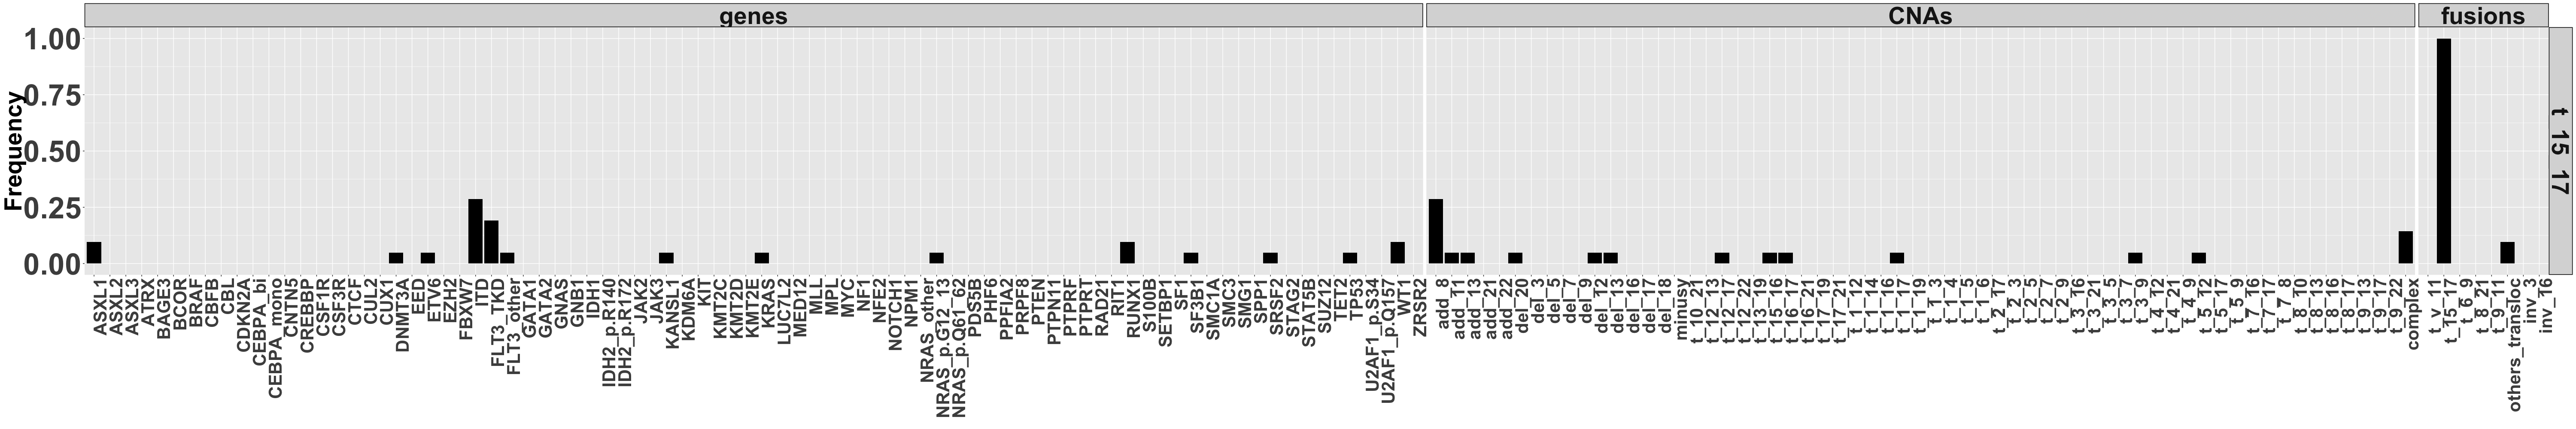

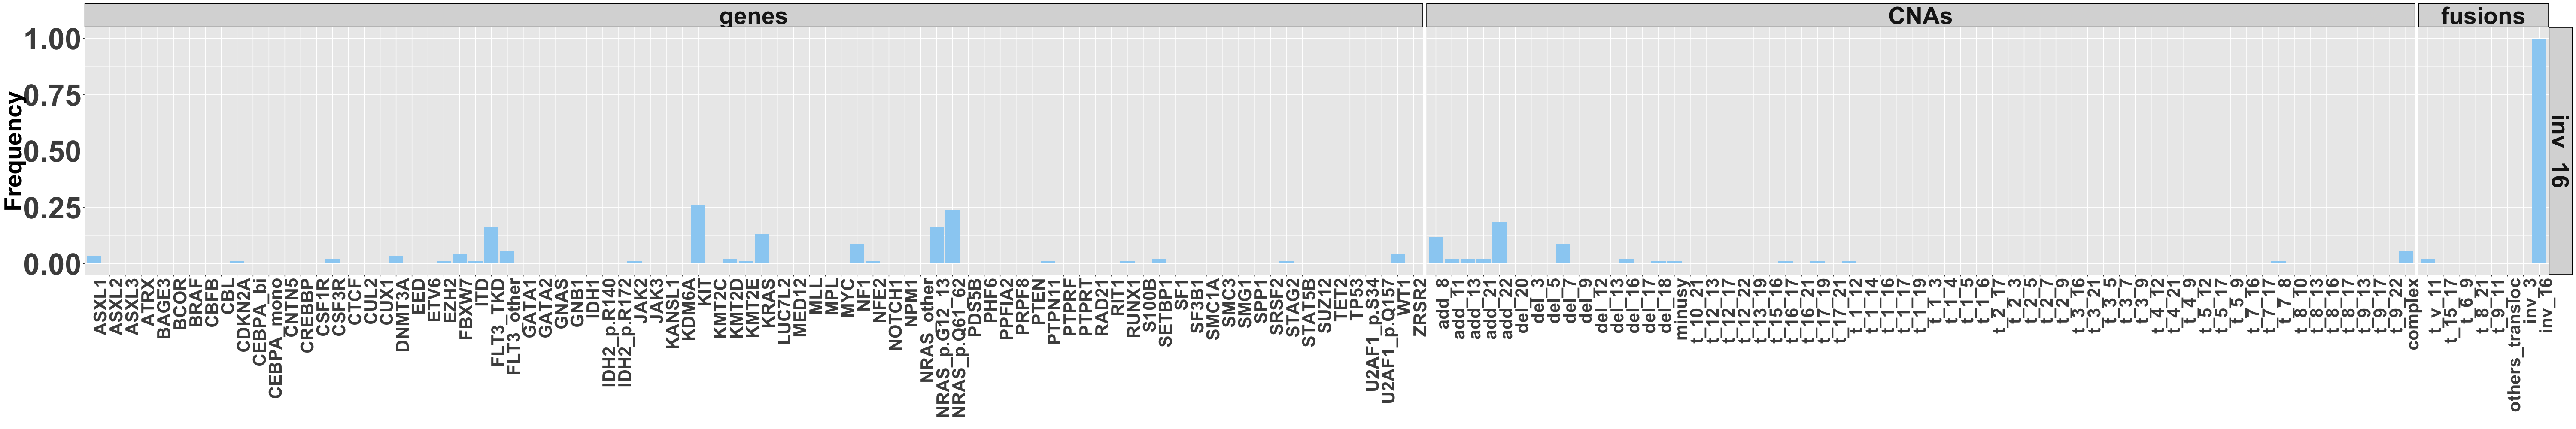

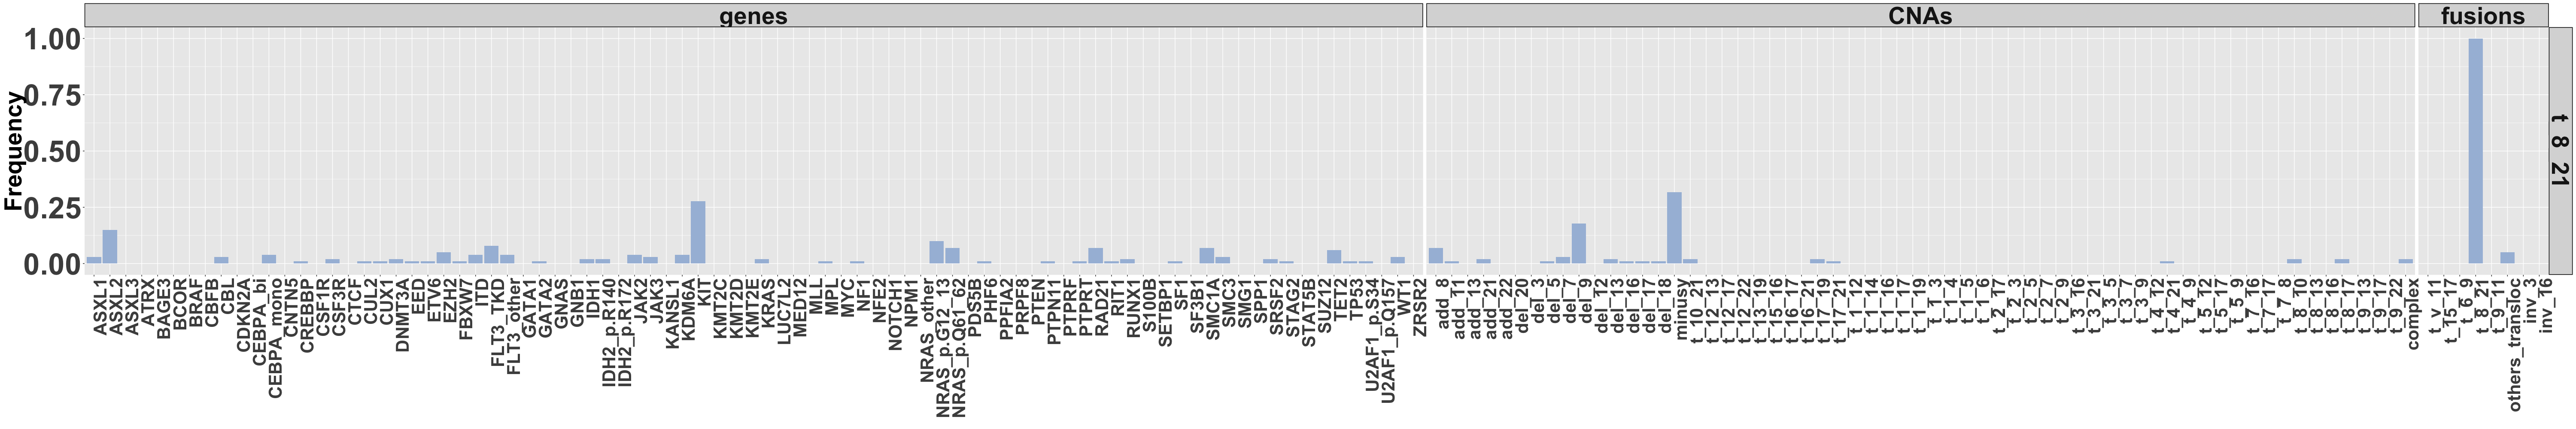

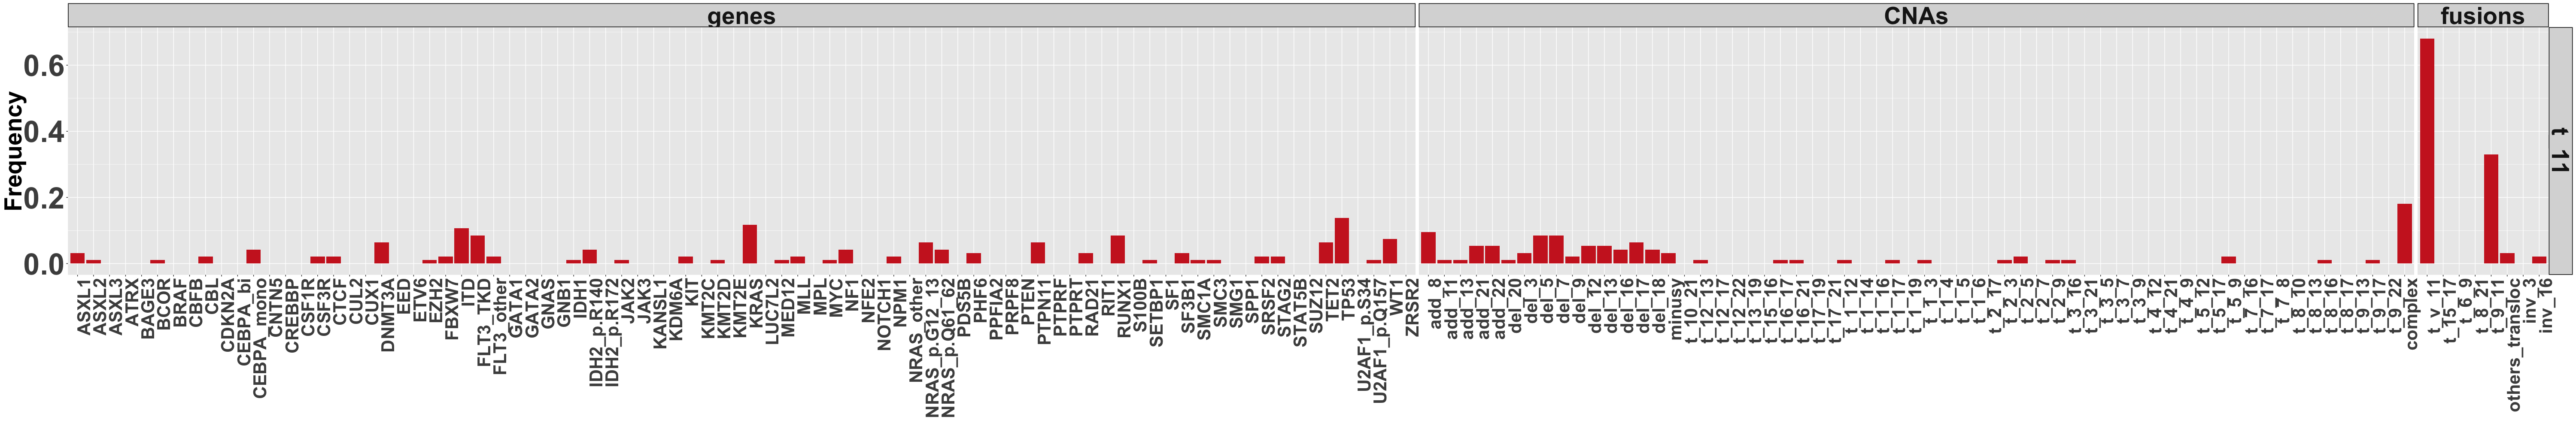

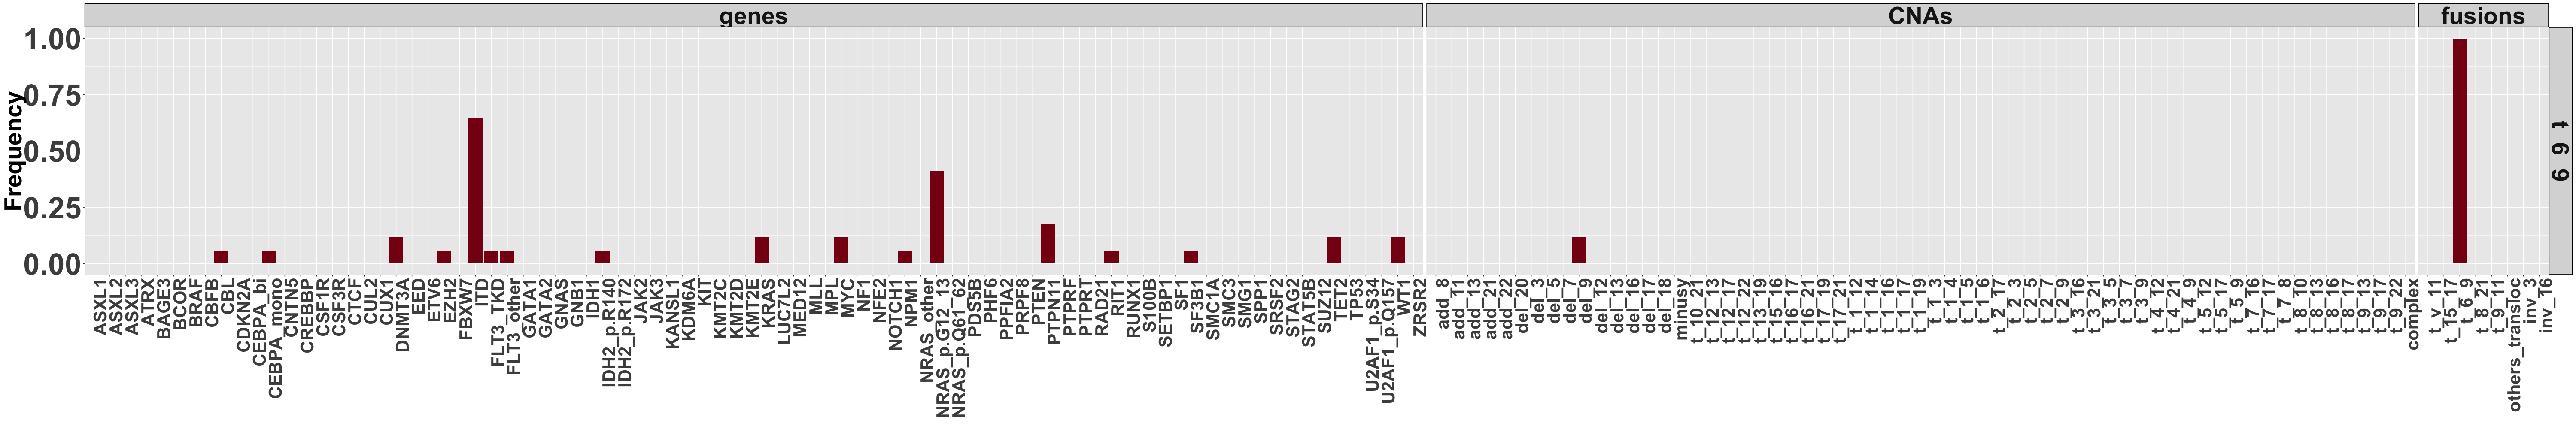

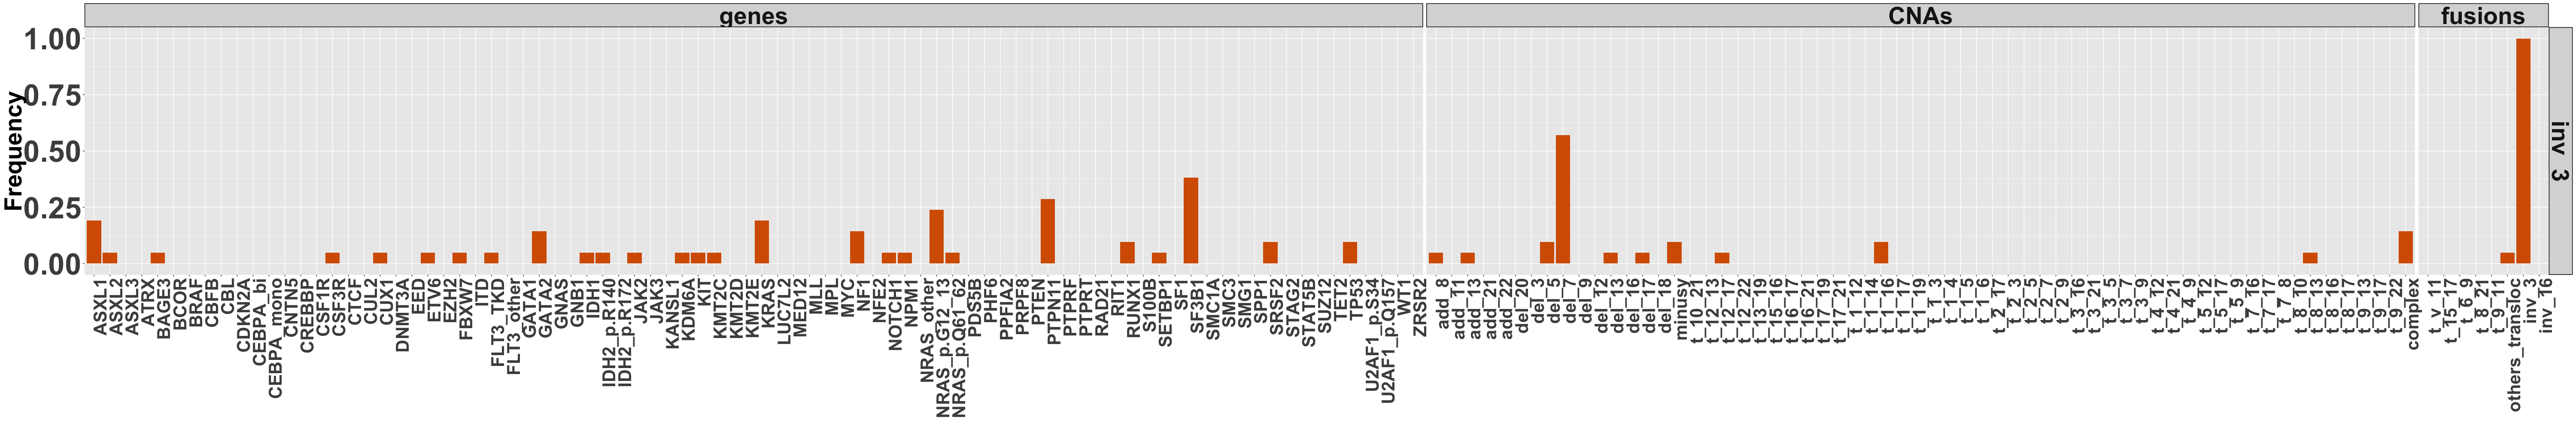

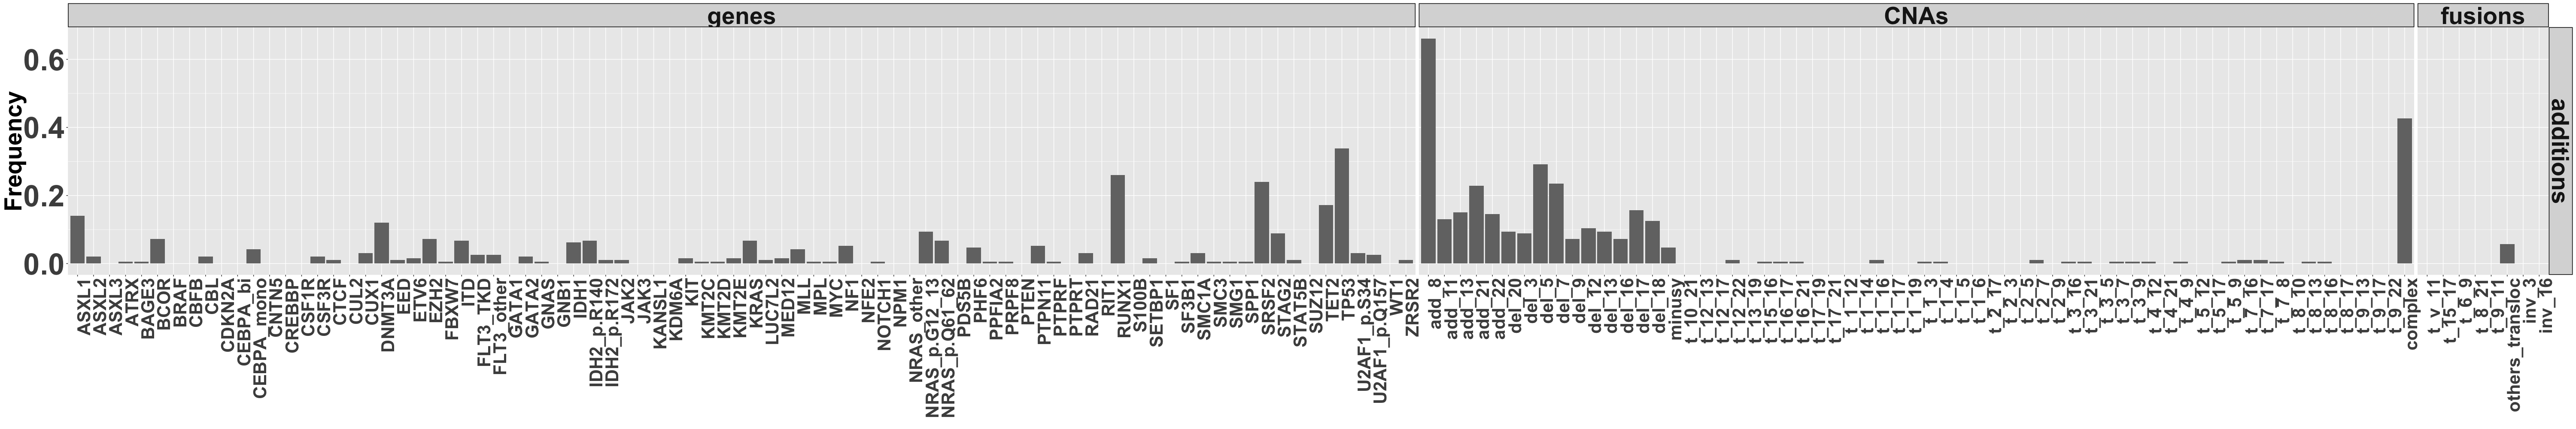

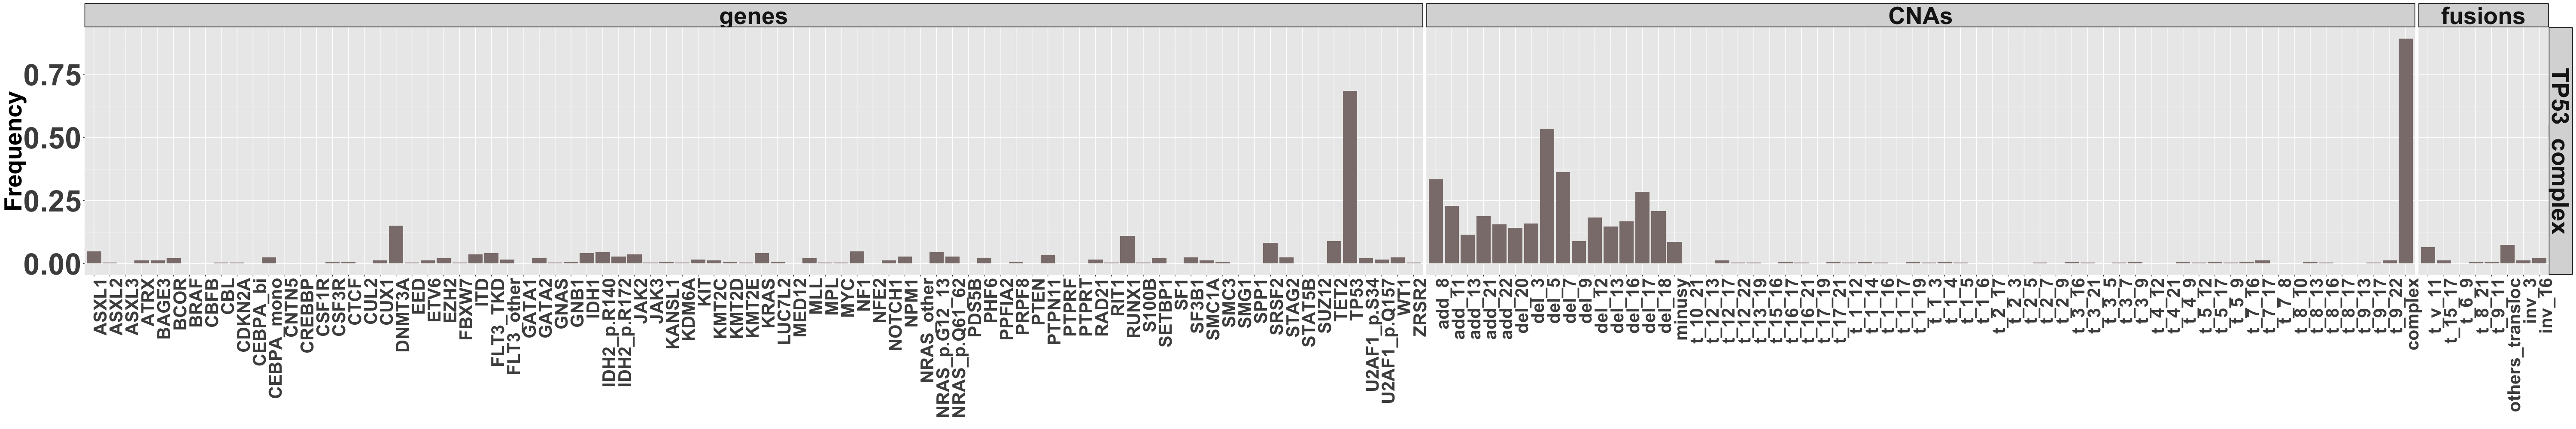

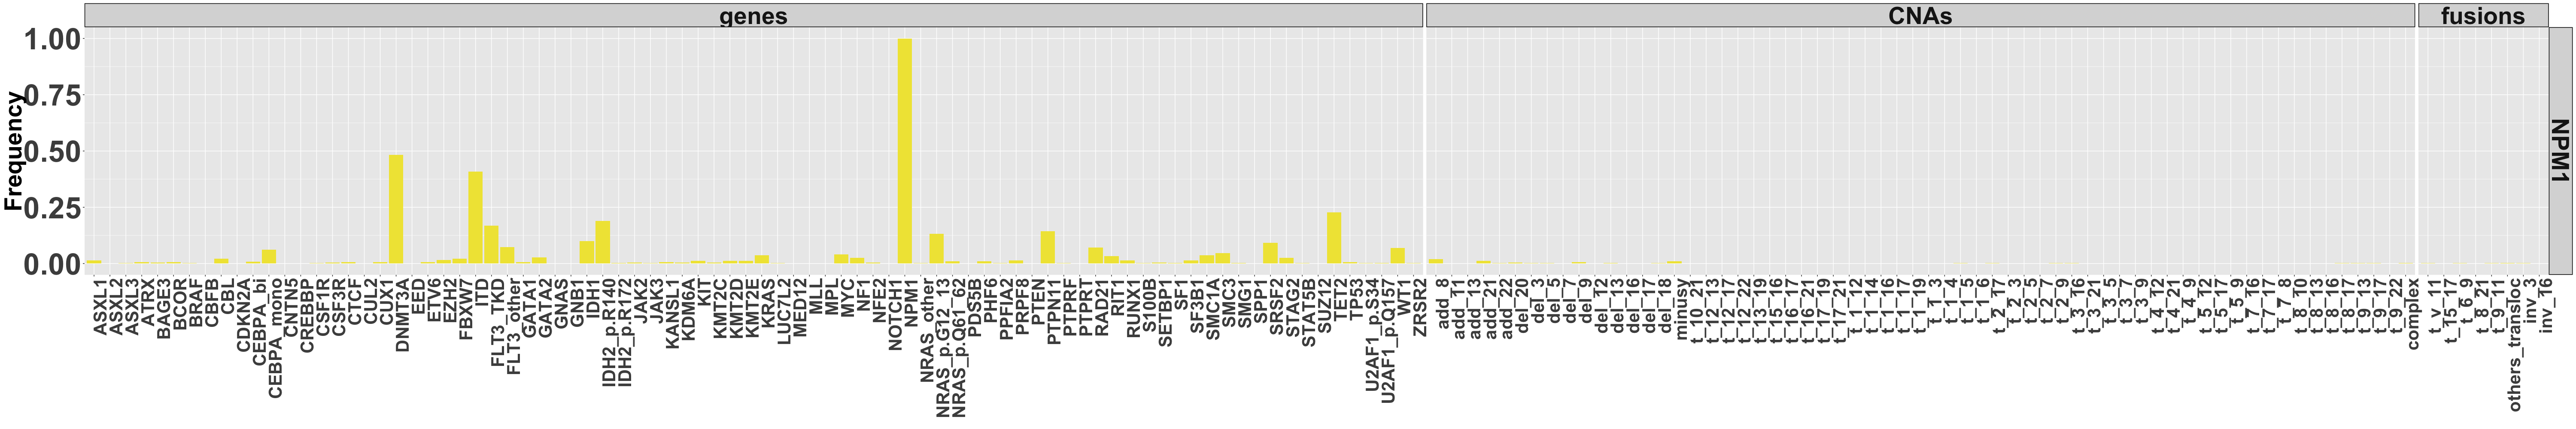

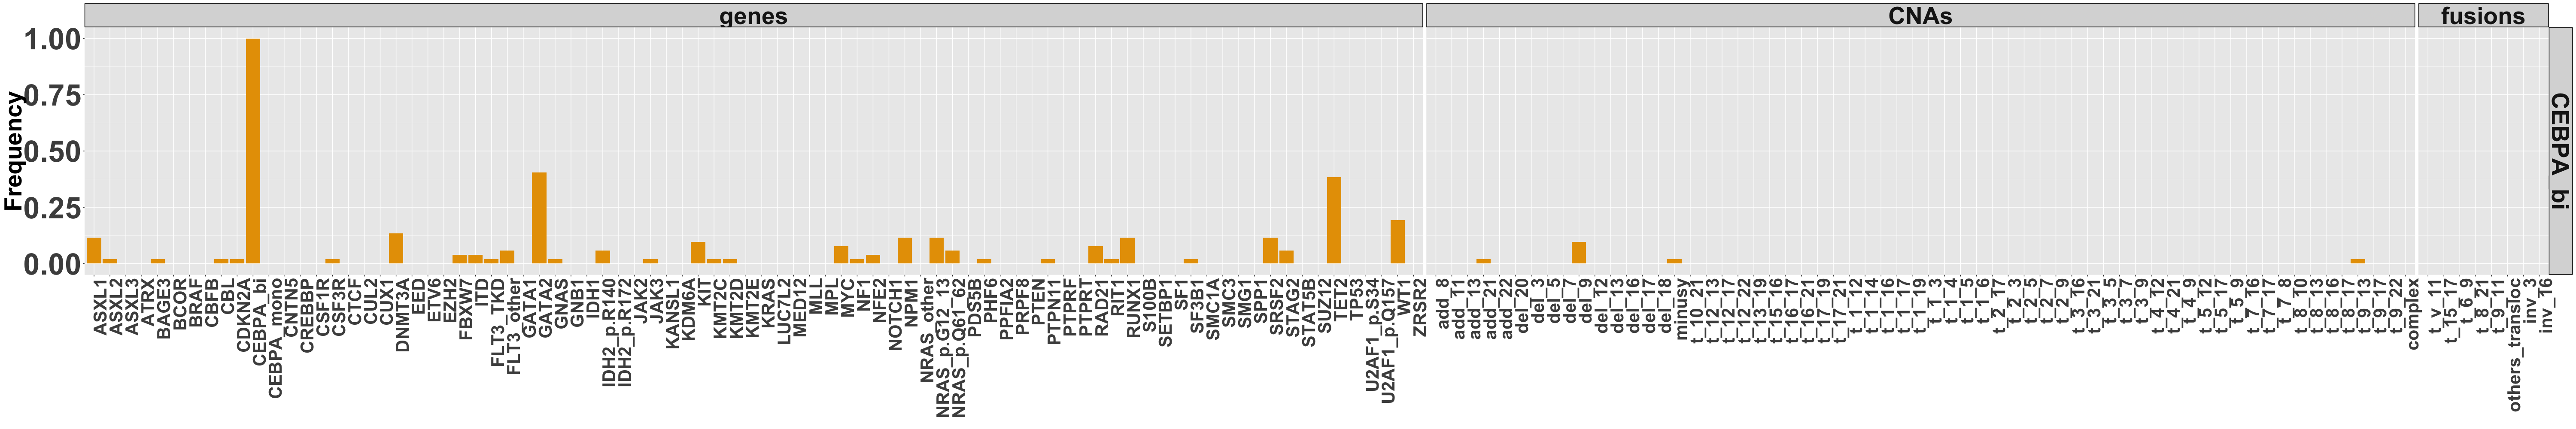

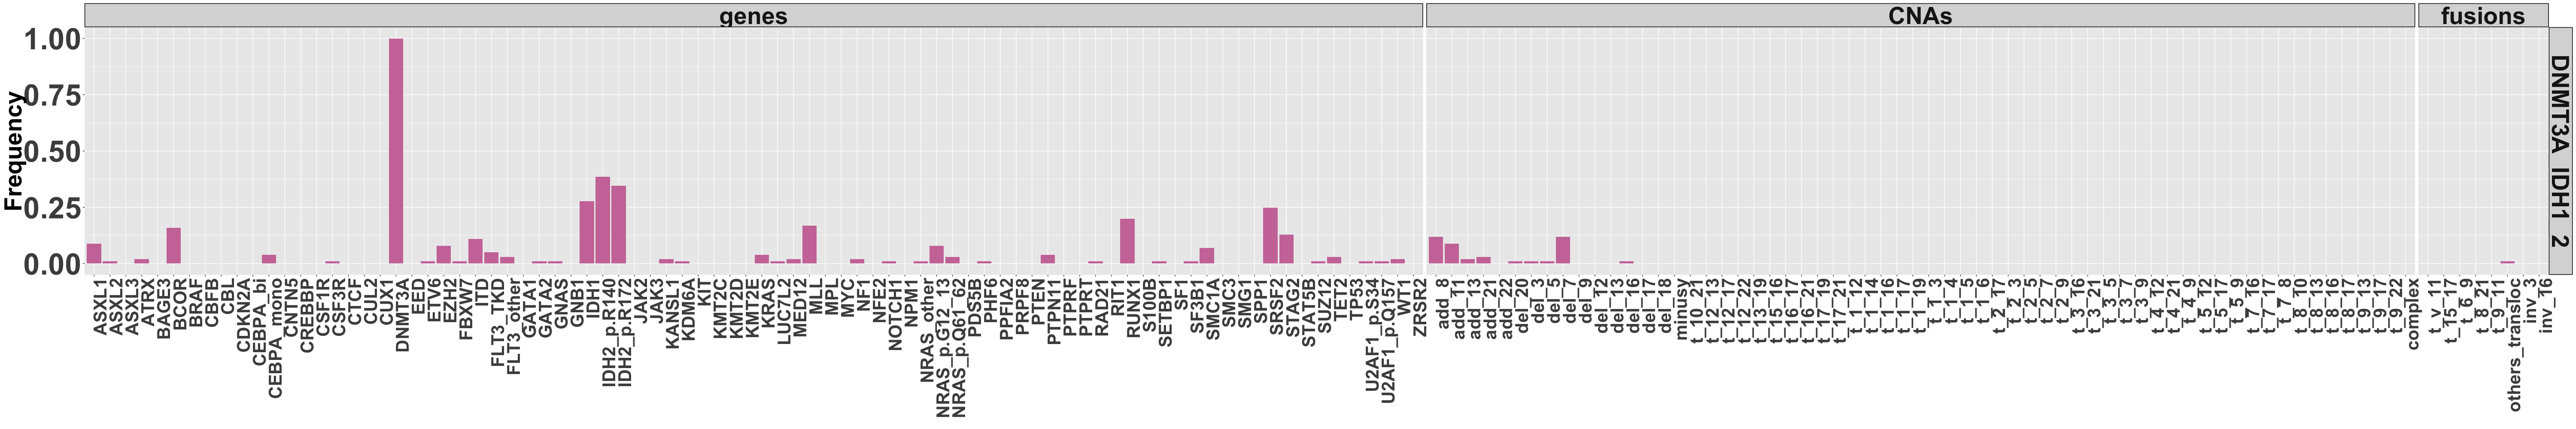

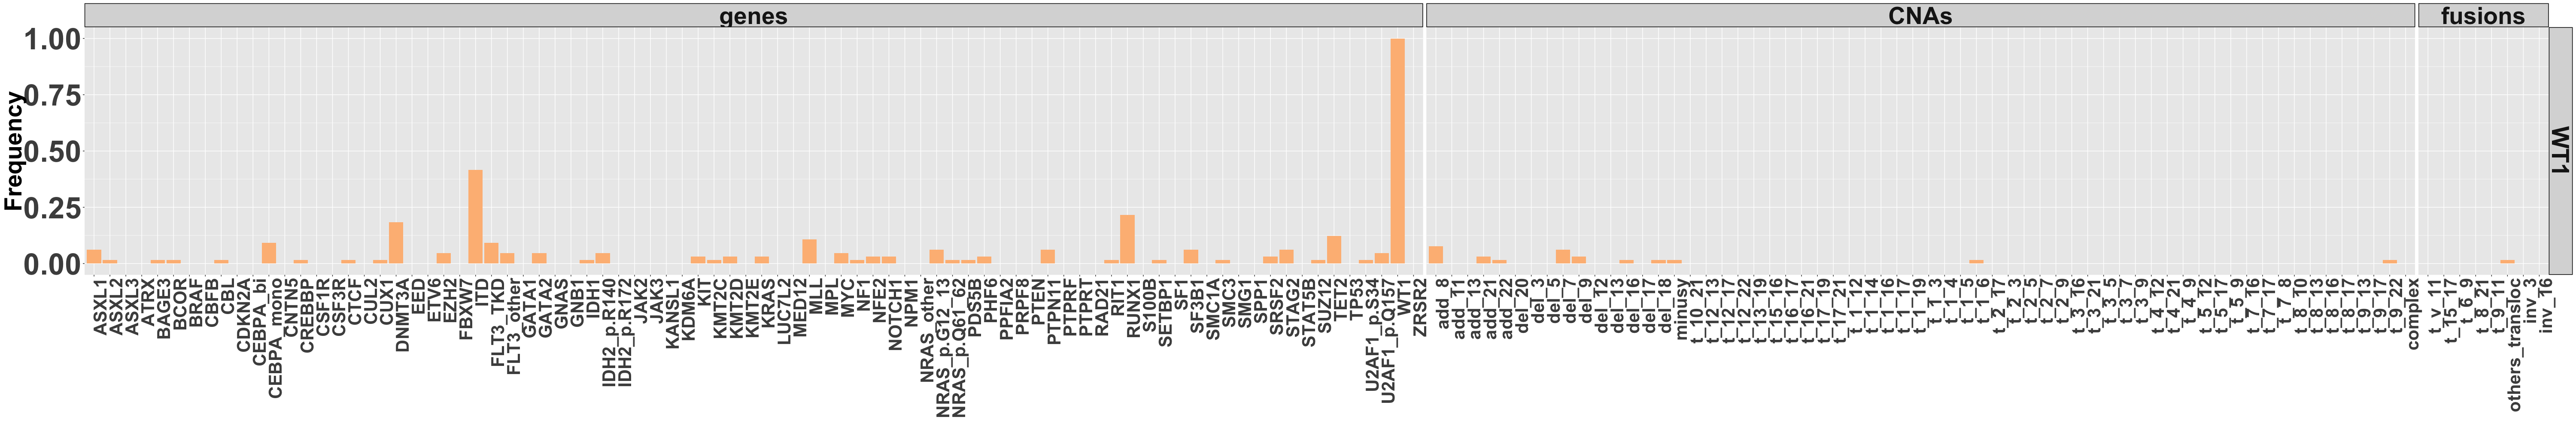

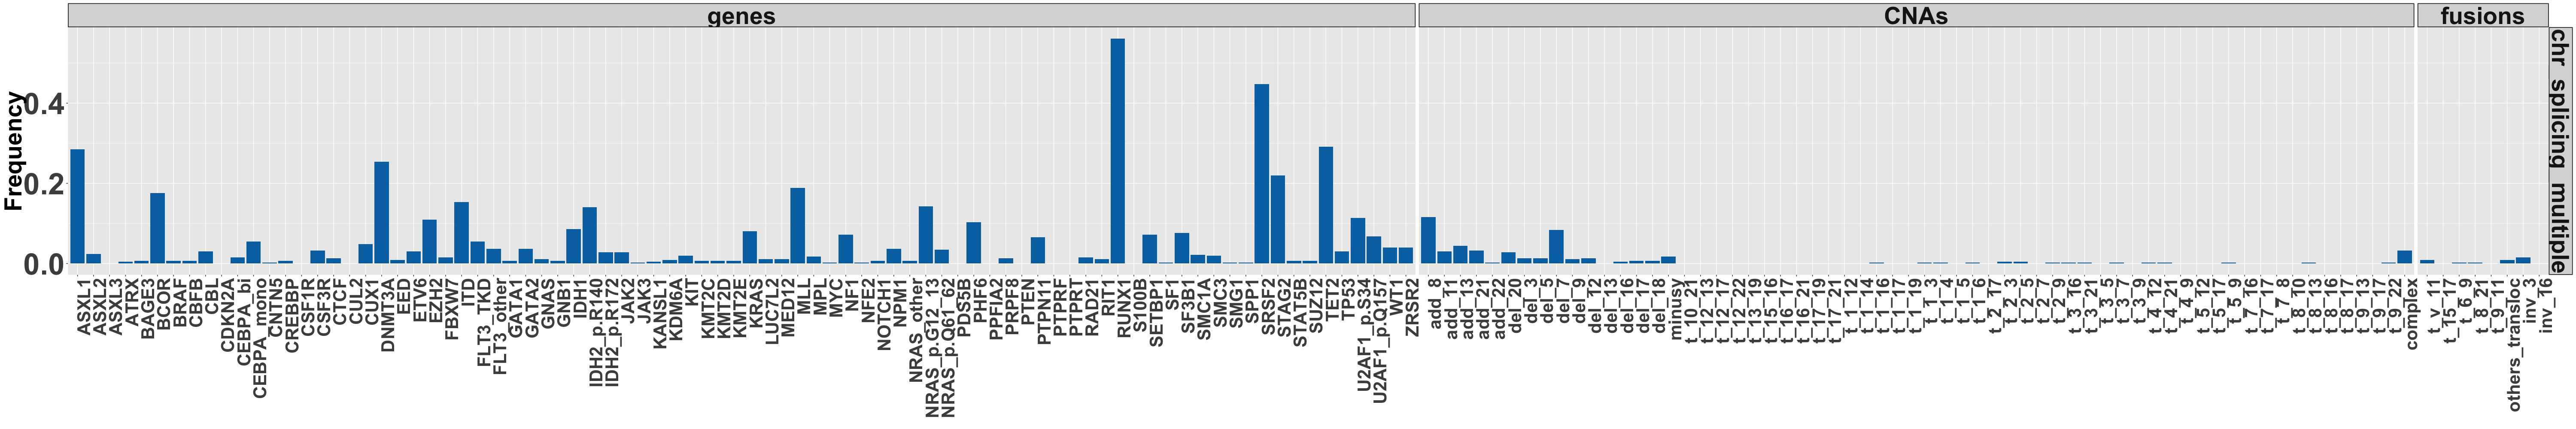

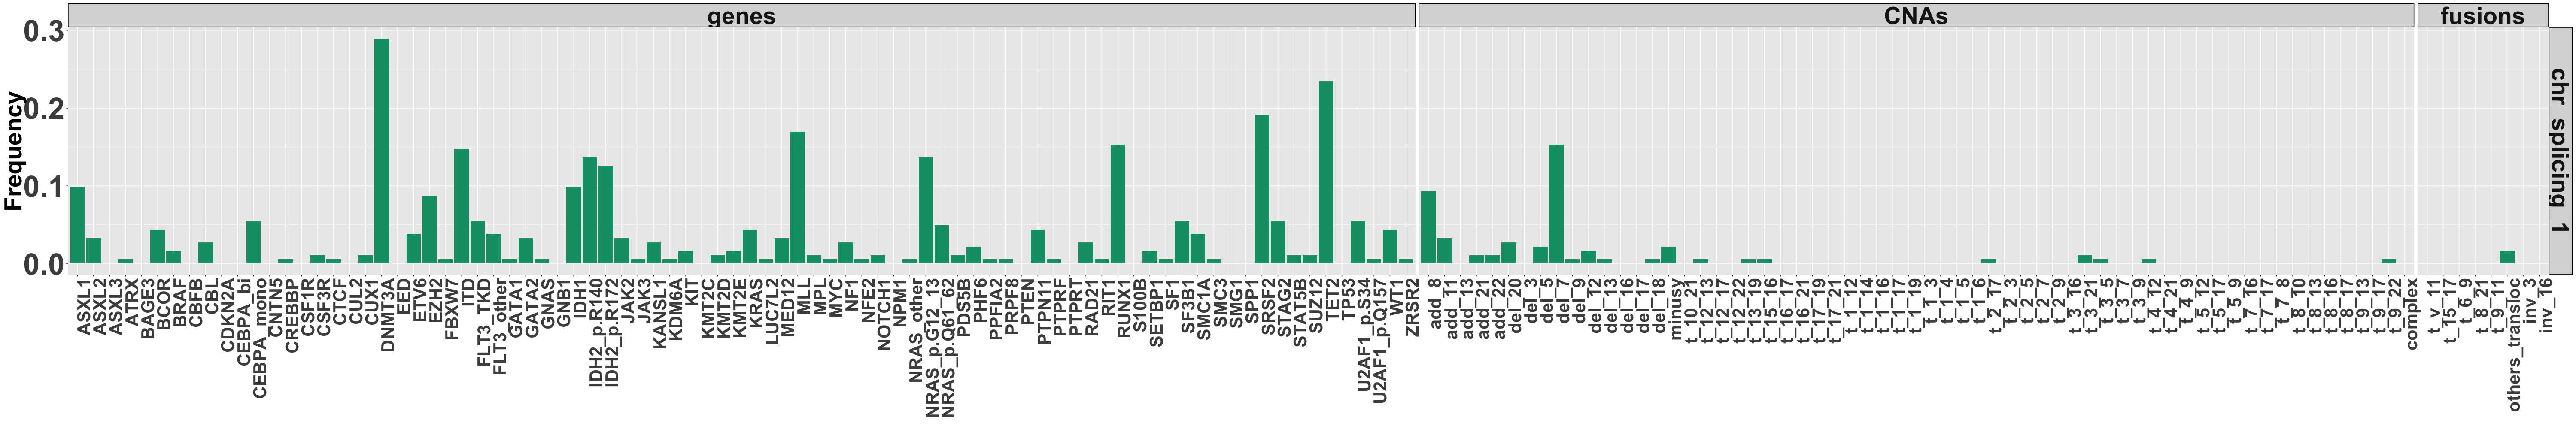

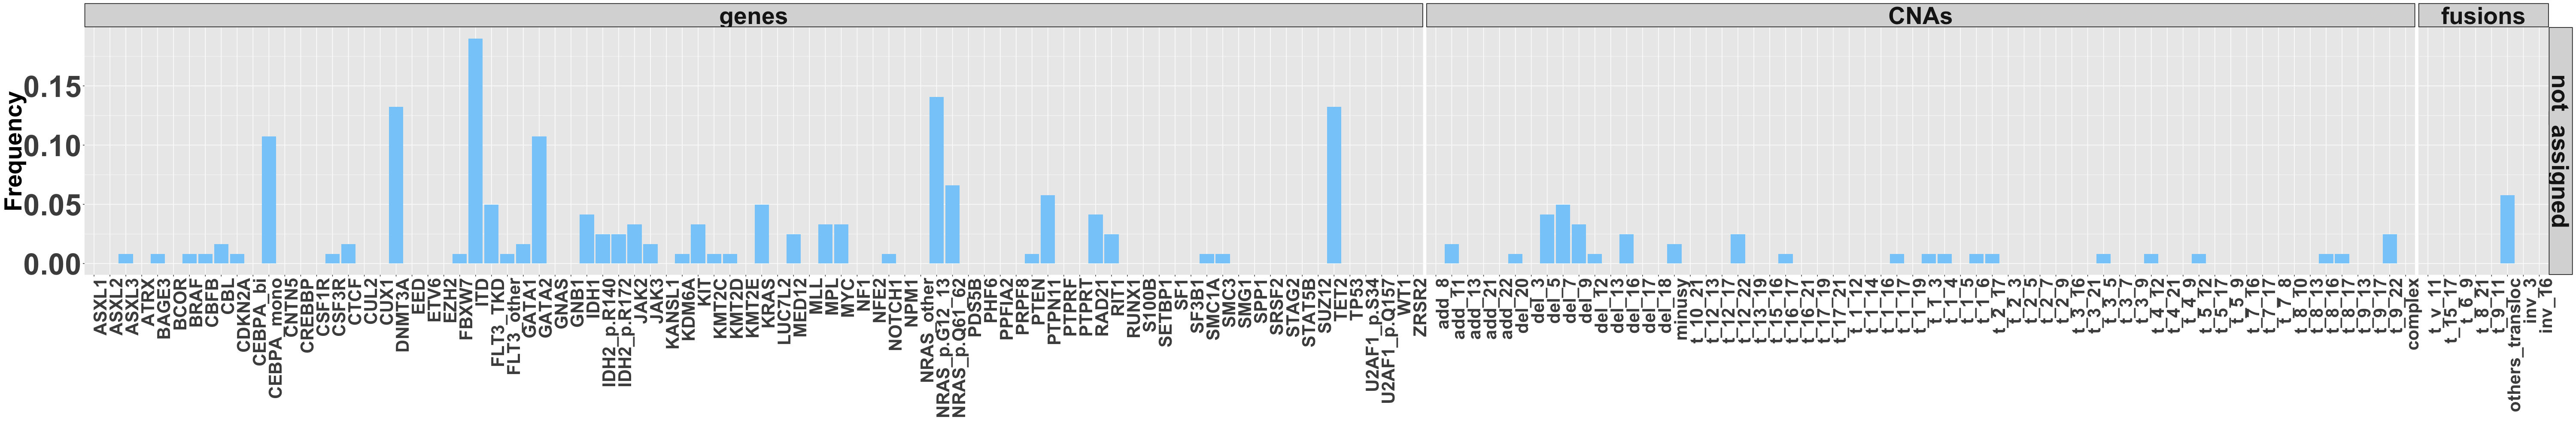

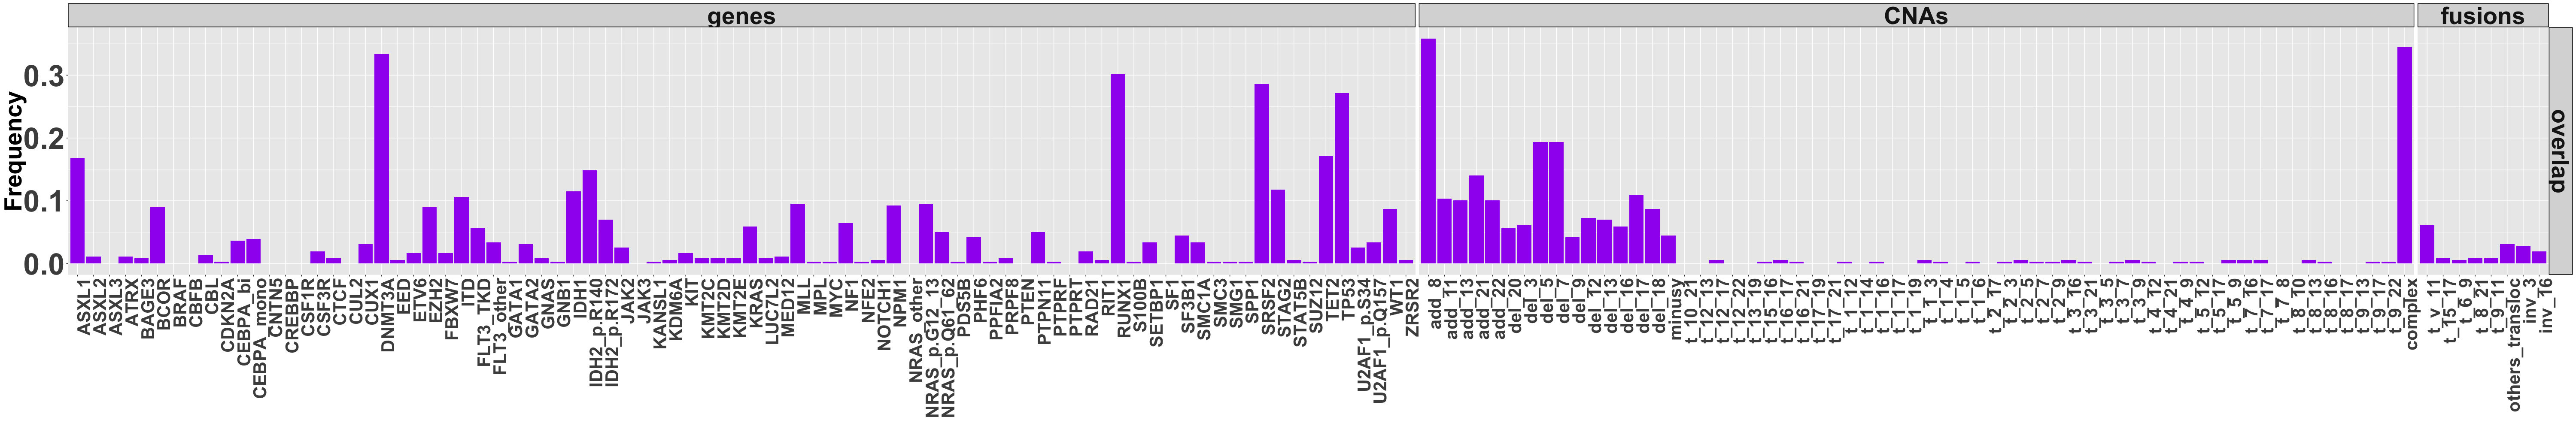

In [7]:
source('tools.R')
for c in comp{
    png()
    comp_features_frequency(df_final,genes,cytos,comp=c,cols_to_keep=c(gen,cyto,"inv_3","t_6_9","t_9_11","t_15_17"),facet_type=T)
}

# png("comp_comp_freq.png",width=4500,height=5500)
genes <- colnames(df_final[,c(5:88)])
cytos <- colnames(df_final[,c(89:158)])
comp <- colnames(df_final[,c(170:186)])# Category plots

set_notebook_plot_size(60,10)

cols_to_keep <- c(gen,cyto,c("inv_3","t_6_9","t_9_11","t_15_17"),comp)
cols_to_keep <- c(genes,cytos,comp)   ### TO MATCH WITH HDP OUTPUT WHEN WE DO ONE BY ONE
tmp_cat <- as.data.frame(df_final[,cols_to_keep])
categories_repartition1 <- data.frame(category = colnames(tmp_cat))

for (i in comp)
    categories_repartition1[sprintf('%s', i)] <- apply(categories_repartition1, 1, function(s) (sum(tmp_cat[tmp_cat[,i] == 1, s['category']])/nrow(tmp_cat[tmp_cat[,i] ==1,])))
categories_repartition1 <- categories_repartition1[!grepl(c("full|overlap"), categories_repartition1$category),]
test <- t(categories_repartition1)
colnames(test) = test[1, ] 
# test = test[-1, ] 
names <- rownames(test)
rownames(test) <- NULL
data <- cbind(names,test)
data <- data[-1,]
                                                      # data <- data[1:3,]
data <- data.frame(data)
data$names <- str_replace(data$names,"full_component_","")
data <- data[!(data$names=="no_events"),]
melt_data <- melt(data,id="names",name="Frequency", variable.name="Variable")
melt_data$value <- as.numeric(melt_data$value)
melt_data$fact <- factor(melt_data$names, levels=c(data$names))
melt_data$separation <- ifelse(melt_data$Variable %in% genes,"genes",
                                ifelse(melt_data$Variable %in% c("t_15_17","t_v_11","t_9_11",'t_8_21','t_6_9','t_8_21',"others_transloc","inv_3","inv_16"),"fusions","CNAs"))
melt_data$separation <- factor(melt_data$separation, levels=c("genes","CNAs","fusions"))


for (name in unique(melt_data$names)){
#     png(paste(name,"_comp_comp_freq.png",sep=""),width=4500,height=1000)
    plot(ggplot(melt_data[melt_data$names==name,], aes(x=Variable, y=value, fill=fact))+
  geom_bar(stat="identity")+facet_grid(fact~separation,scales = "free_x", space = "free_x")+theme(strip.text = element_text(face="bold", size=40,lineheight=5.0),
strip.background = element_rect( colour="black",
size=1),legend.position="none")+ylab("Frequency")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=120,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1, size=30,face="bold"),axis.text.y = element_text(size=50,face="bold"))+
     theme(axis.title.y = element_text(size = 40, angle = 90, vjust = 0.25,face="bold"))+
                                                       scale_fill_manual(values=color_values,limits=levels(tmp$fill_pal))+theme(legend.position = "none")+ylab("Frequency")+xlab(""))

#     dev.off()
    }
# dev.off()

# ADDITION GENE COMPARISON

In [32]:
png("addition_strat_freq.png",width=6500,height=2500,res=120)
genes <- colnames(df_final[,c(5:88)])
cytos <- colnames(df_final[,c(89:158)])
comp <- colnames(df_final[,c(170:186)])# Category plots

set_notebook_plot_size(70,20)

# cols_to_keep <- c(gen,cyto,c("inv_3","t_6_9","t_9_11","t_15_17"),comp)
cols_to_keep <- c(genes,cytos,"full_component_additions","eln_2017_adverse","eln_2017_intermediate")
tmp_cat <- as.data.frame(df_final[(df_final$eln_2017_adverse==1 | df_final$eln_2017_intermediate==1),cols_to_keep])
categories_repartition1 <- data.frame(category = colnames(tmp_cat))

for (i in c("eln_2017_adverse","eln_2017_intermediate"))
    categories_repartition1[sprintf('%s', i)] <- apply(categories_repartition1, 1, function(s) (sum(tmp_cat[tmp_cat[,i] == 1, s['category']])/nrow(tmp_cat[tmp_cat[,i] ==1,])))
categories_repartition1 <- categories_repartition1[!grepl(c("full|overlap"), categories_repartition1$category),]
test <- t(categories_repartition1)
                                                       
colnames(test) = test[1, ] 



names <- rownames(test)
rownames(test) <- NULL
data <- cbind(names,test)
data <- data[-1,]

data <- data.frame(data)
data$names <- str_replace(data$names,"eln_2017_","")
data$eln_2017_adverse <- NULL
data$eln_2017_intermediate <- NULL
melt_data <- melt(data,id="names",name="Frequency", variable.name="Variable")
melt_data$value <- as.numeric(melt_data$value)
melt_data$fact <- factor(melt_data$names, levels=c(data$names))

ggplot(melt_data, aes(x=Variable, y=value, fill=fact))+
  geom_bar(stat="identity")+facet_grid(fact~.)+theme(strip.text = element_text(face="bold", size=40,lineheight=5.0),
strip.background = element_rect( colour="black",size=1),legend.position="none")+ylab("Frequency")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=50,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1, size=30,face="bold"),axis.text.y = element_text(size=50,face="bold"))+
     theme(axis.title.y = element_text(size = 40, angle = 90, vjust = 0.25,face="bold"))+
                                                       scale_fill_manual(values=c("grey45","#EE9937"))+theme(legend.position = "none")+ylab("Frequency")+xlab("")
dev.off()

Warning message:
“attributes are not identical across measure variables; they will be dropped”

pdf 
  2

# HDP 2 UNI FREQ

In [137]:
png("comp_comp_freq.png",width=4500,height=5500)
genes <- colnames(df_final[,c(5:88)])
cytos <- colnames(df_final[,c(89:158)])
comp <- colnames(df_final[,c(170:186)])# Category plots

set_notebook_plot_size(60,10)

# cols_to_keep <- c(gen,cyto,c("inv_3","t_6_9","t_9_11","t_15_17"),comp)
cols_to_keep <- c(genes,cytos,comp)
tmp_cat <- as.data.frame(df_final[,cols_to_keep])
categories_repartition1 <- data.frame(category = colnames(tmp_cat))

for (i in comp)
    categories_repartition1[sprintf('%s', i)] <- apply(categories_repartition1, 1, function(s) (sum(tmp_cat[tmp_cat[,i] == 1, s['category']])/nrow(tmp_cat[tmp_cat[,i] ==1,])))
categories_repartition1 <- categories_repartition1[!grepl(c("full|overlap"), categories_repartition1$category),]
test <- t(categories_repartition1)
colnames(test) = test[1, ] 
# test = test[-1, ] 
names <- rownames(test)
rownames(test) <- NULL
data <- cbind(names,test)
data <- data[-1,]
                                                      # data <- data[1:3,]
data <- data.frame(data)
data$names <- str_replace(data$names,"full_component_","")
                                                       
## DROP FOR HDP2 TO HAVE SAME COLUMN NAMES
drop <- c('CSF1R','CUL2','NPM1','PTPRT','S100B','t_10_21','t_12_17','t_15_17',
't_17_19','t_17_21','t_1_12','t_1_14','t_1_19','t_1_5','t_3_9','t_4_9','t_5_17',
't_7_16','t_7_17','t_8_10','t_8_13','t_8_21','t_9_13','t_9_17','inv_16')                                                     
data = data[,!(names(data) %in% drop)]                                                      
                                                       
                                                       
                                                       
data <- data[!(data$names=="no_events"),]
melt_data <- melt(data,id="names",name="Frequency", variable.name="Variable")
melt_data$value <- as.numeric(melt_data$value)
melt_data$fact <- factor(melt_data$names, levels=c(data$names))

for (name in unique(melt_data$names)){
    png(paste(name,"_comp_comp_freq_hdp2.png",sep=""),width=4500,height=1000)
    plot(ggplot(melt_data[melt_data$names==name,], aes(x=Variable, y=value, fill=fact))+
      geom_bar(stat="identity")+facet_grid(fact~.)+theme(strip.text = element_text(face="bold", size=40,lineheight=5.0),
    strip.background = element_rect( colour="black",
    size=1),legend.position="none")+ylab("Frequency")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=30,face="bold"),axis.text.x = element_text(angle = 90, hjust = 1, size=30),axis.text.y = element_text(size=30,face="bold"))+
         theme(axis.title.y = element_text(size = 40, angle = 90, vjust = 0.25,face="bold"))+
                                                           scale_fill_manual(values="grey45")+theme(legend.position = "none"))
    dev.off()
    }
dev.off()

Warning message:
“attributes are not identical across measure variables; they will be dropped”

quartz_off_screen 
                3

# TP53 COMPLEX ANALYSIS

In [57]:
val <- c("#5C5C5C","#EE9937","darkgreen")
plot_surv <-function(fit,tmp,submain="",vals=val,legend="top",risk.tab=T, leg.labs = "",remove=F,y=""){
    p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",ylab=y,
legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(60,"plain" , "black"),
                 font.submain = c(30, "plain", "black"),
                 font.legend=35,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30,"plain" , "black"),
                 font.y = c(30,"plain" , "black"),
                 font.tickslab = c(30, "plain", "black")))
    if(remove==T) {
        p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",ylab=y,
legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(60, "bold", "black"),
                 font.submain = c(30, "bold.italic", "black"),
                 font.legend=25,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30, "bold.italic", "black"),
                 font.y = c(30, "bold.italic", "black"),
                 font.tickslab = c(30, "plain", "black")))
                      
                      
    }
    p$plot

}

In [63]:
tmp <- df_w_correlates[df_w_correlates$full_component_TP53_complex==1,]

tmp$comparison <- ifelse(tmp$TP53==1 & tmp$complex==1,"TP53-complex",
                        ifelse(tmp$TP53==1,"TP53","complex"))
tmp$comparison <- factor(tmp$comparison)

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
png("tp53_complex_strat_surv.png",width=5000,height=5000,res=300)
plot_surv(fit,legend="top",submain="TP53-complex Component",risk.tab=F,leg.labs=c("complex, n=77", "TP53, n=26","TP53-complex, n=142"),y="Survival Probability",remove=F)
dev.off()

pdf 
  2

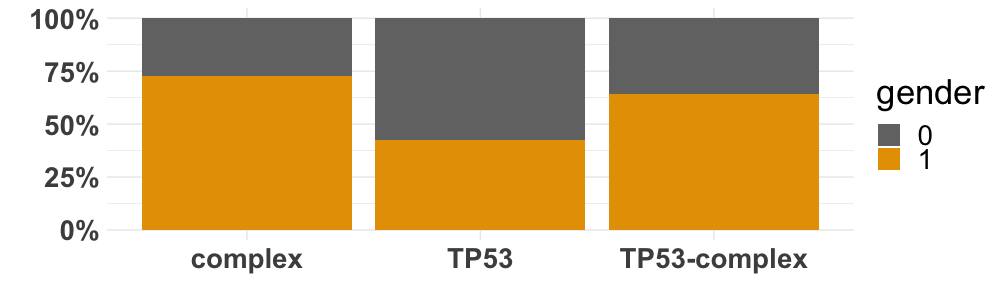

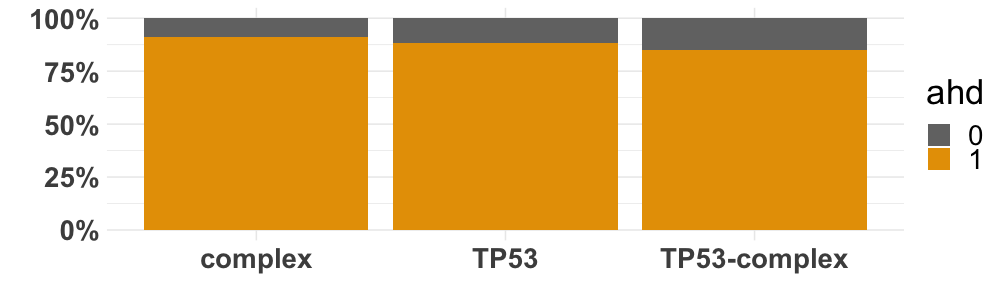

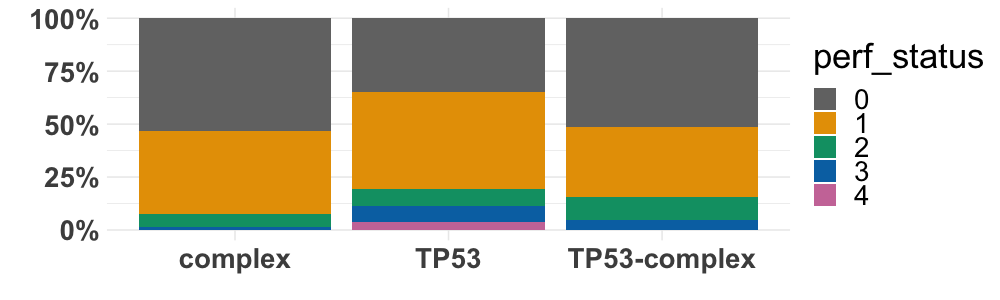

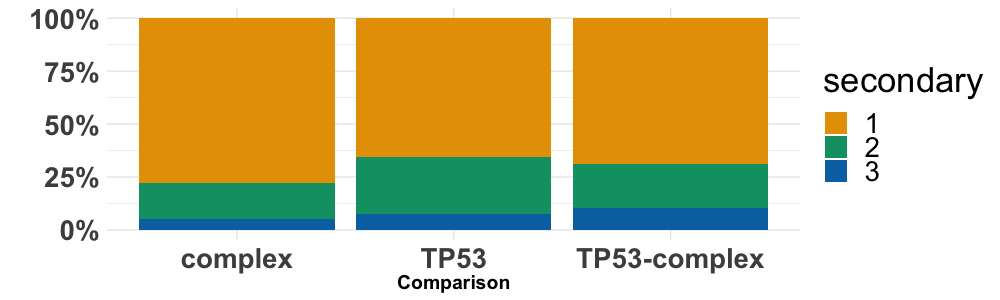

In [52]:
binary_correlates <- c("gender","ahd","perf_status","secondary")
continuous_correlates <- c("age","wbc","hb","plt","bm_blasts")
set_notebook_plot_size(10,3)
# pdf(file="graphs/comparison_components.pdf",width=30,height=5)
v=c("0" = "grey45", "1" = "#e79f00", "2" = "#009E73", "3" ="#0072B2", "4"="#CC79A7")
tmp <- NULL
p <- list()
q <- list()
tmp <- df_w_correlates[df_w_correlates$full_component_TP53_complex==1,]

tmp$comparison <- ifelse(tmp$TP53==1 & tmp$complex==1,"TP53-complex",
                        ifelse(tmp$TP53==1,"TP53","complex"))
tmp$comparison <- factor(tmp$comparison)
i <- 1
set_notebook_plot_size(10,3)
for (bin in binary_correlates){
    plot(ggplot(tmp, aes(factor(comparison), fill = factor(tmp[,bin]))) + 
      geom_bar(position = "fill") +
      scale_y_continuous(labels = scales::percent)+
      xlab(ifelse(i==4,"Comparison",""))+scale_fill_manual(values = v)+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=20,face="bold"),
                                                                             axis.title=element_text(size=14,face="bold"),legend.title = element_text(size=25),legend.text = element_text(size=20))+
        guides(fill=guide_legend(title=bin))+ylab(""))
i <- i+1
}
p <-ggplot(tmp,aes(x=comparison,y=tmp[,"age"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("TP53-complex","TP53"),c("TP53-complex","complex"),c("TP53","complex")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("age")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


q <-ggplot(tmp,aes(x=comparison,y=tmp[,"wbc"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("TP53-complex","TP53"),c("TP53-complex","complex"),c("TP53","complex")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("wbc")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")

r <-ggplot(tmp,aes(x=comparison,y=tmp[,"hb"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("TP53-complex","TP53"),c("TP53-complex","complex"),c("TP53","complex")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("hb")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


s <-ggplot(tmp,aes(x=comparison,y=tmp[,"plt"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("TP53-complex","TP53"),c("TP53-complex","complex"),c("TP53","complex")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("plt")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


t <-ggplot(tmp,aes(x=comparison,y=tmp[,"bm_blasts"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("TP53-complex","TP53"),c("TP53-complex","complex"),c("TP53","complex")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("bm_blasts")+xlab("Comparison")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


In [53]:
png("p53_comp.png",width=4000,height=6100,res=200)
set_notebook_plot_size(30,30)
grid.arrange(p,q,r,s,t,nrow=5)
dev.off()

pdf 
  2

# ADDITION CORRELATES COMPARISON BY ELN

In [64]:
tmp <- df_w_correlates[df_w_correlates$full_component_additions==1,]
table(tmp$eln_2017)


  1   2 
151  41 

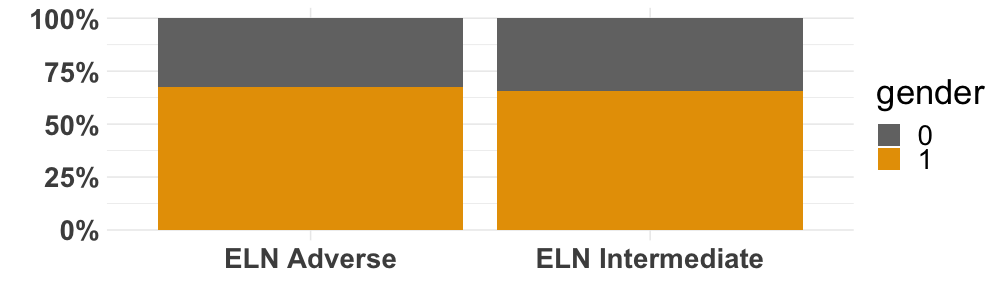

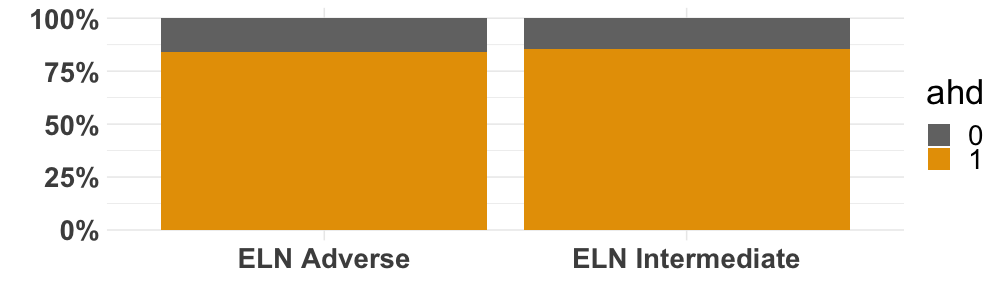

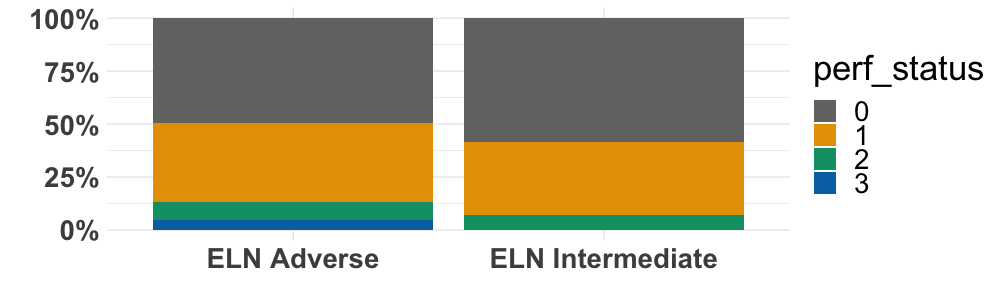

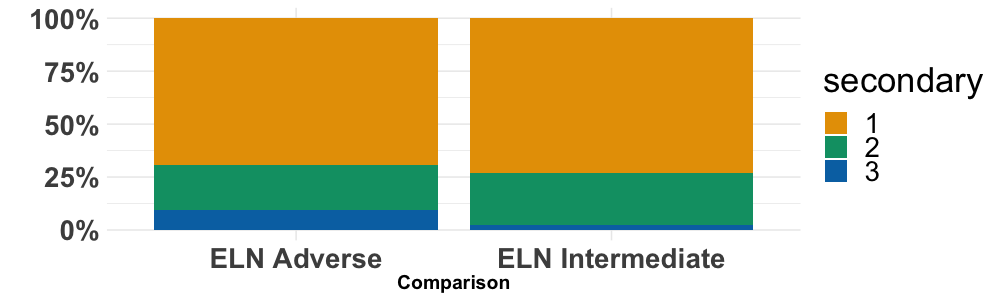

In [65]:
binary_correlates <- c("gender","ahd","perf_status","secondary")
continuous_correlates <- c("age","wbc","hb","plt","bm_blasts")
set_notebook_plot_size(10,3)
# pdf(file="graphs/comparison_components.pdf",width=30,height=5)
v=c("0" = "grey45", "1" = "#e79f00", "2" = "#009E73", "3" ="#0072B2", "4"="#CC79A7")
tmp <- NULL
p <- list()
q <- list()
tmp <- df_w_correlates[df_w_correlates$full_component_additions==1,]

tmp$comparison <- ifelse(tmp$eln_2017_intermediate==1,"ELN Intermediate","ELN Adverse")
tmp$comparison <- factor(tmp$comparison)
i <- 1
set_notebook_plot_size(10,3)
for (bin in binary_correlates){
    plot(ggplot(tmp, aes(factor(comparison), fill = factor(tmp[,bin]))) + 
      geom_bar(position = "fill") +
      scale_y_continuous(labels = scales::percent)+
      xlab(ifelse(i==4,"Comparison",""))+scale_fill_manual(values = v)+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=20,face="bold"),
                                                                             axis.title=element_text(size=14,face="bold"),legend.title = element_text(size=25),legend.text = element_text(size=20))+
        guides(fill=guide_legend(title=bin))+ylab(""))
i <- i+1
}
p <-ggplot(tmp,aes(x=comparison,y=tmp[,"age"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("age")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


q <-ggplot(tmp,aes(x=comparison,y=tmp[,"wbc"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("wbc")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")

r <-ggplot(tmp,aes(x=comparison,y=tmp[,"hb"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("hb")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


s <-ggplot(tmp,aes(x=comparison,y=tmp[,"plt"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("plt")+xlab("")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


t <-ggplot(tmp,aes(x=comparison,y=tmp[,"bm_blasts"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("bm_blasts")+xlab("Comparison")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


In [74]:
table(df_w_correlates$os_status)/nrow(df_w_correlates)


        0         1 
0.3567059 0.6432941 

In [69]:
set_notebook_plot_size(30,30)
png("eln_additions_comp.png",width=4000,height=6100,res=250)
grid.arrange(p,q,r,s,t,nrow=5)
dev.off()

pdf 
  2

# CHR SPLICEOSOME ANALYSIS

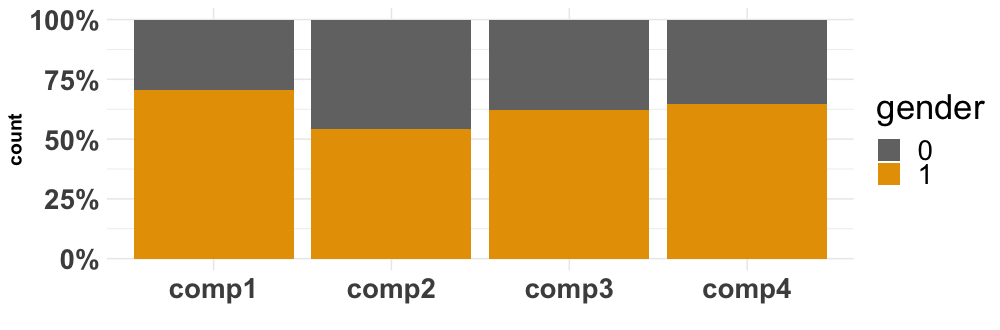

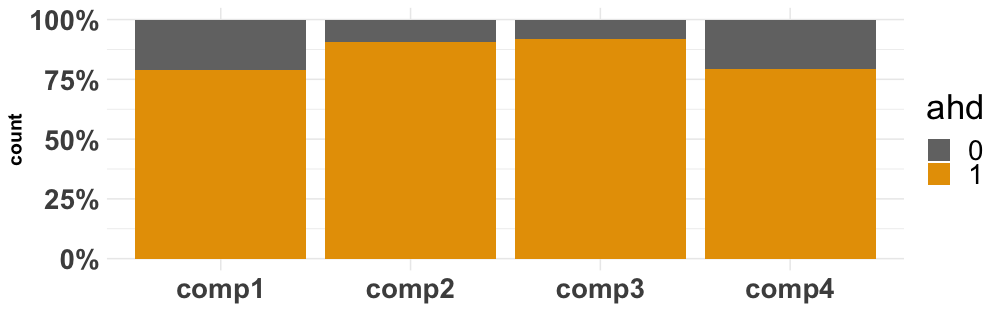

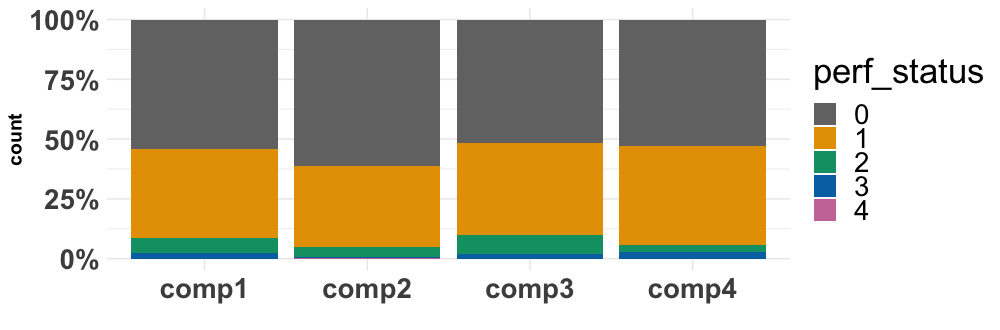

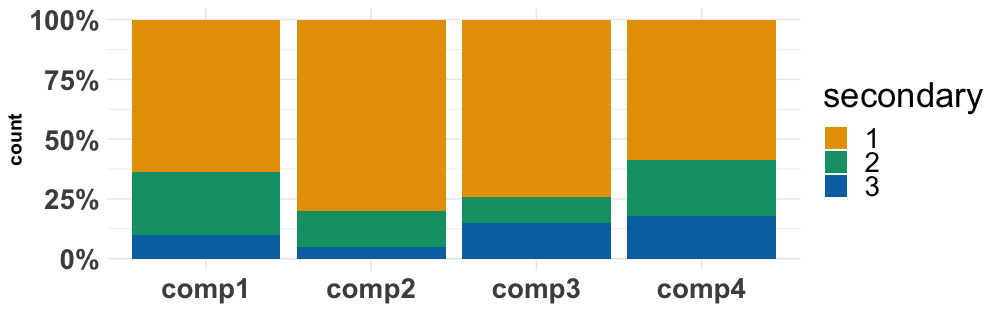

In [173]:
factors <- c("ZRSR2","U2AF1_p.S34","U2AF1_p.Q157","SRSF2","SF3B1","ASXL1","STAG2","BCOR","RUNX1","EZH2","MLL","PHF6","SF1","NF1","CUX1","SETBP1")
data_hdp2 <- read.table("hdp2_data.tsv")
data_hdp2 <-data_hdp2[,c("second_hdp_initial_predicted_component","second_hdp_max_proba")]
master <- read.table('../../data/initial_dataset/Master_04_10_2019.csv',sep=",",header=T)
rownames(master) <- master$data_pd
# df <- read.table('../clustering/clustering_Final_1/df_final_full_component.tsv')
data_hdp2 <- merge(data_hdp2,master,by=0)
# rownames(df_merge) <- df_merge$Row.names
# df_merge <- df_merge[-1]

data_hdp2 <- data_hdp2[(data_hdp2$second_hdp_initial_predicted_component %in% c(1,2,3,4)) ,]
data_hdp2$comparison <- ifelse(data_hdp2$second_hdp_initial_predicted_component==1,"comp1",
                            ifelse(data_hdp2$second_hdp_initial_predicted_component==2,"comp2",
                                   ifelse(data_hdp2$second_hdp_initial_predicted_component==3,"comp3","comp4")))
tmp <- data_hdp2[!is.na(data_hdp2$ahd),]
set_notebook_plot_size(10,3.3)

for (bin in binary_correlates){
    plot(ggplot(tmp, aes(factor(comparison), fill = factor(tmp[,bin]))) + 
      geom_bar(position = "fill") +
      scale_y_continuous(labels = scales::percent)+ guides(fill=guide_legend(title=bin))+
      xlab(ifelse(i==4,"Comparison",""))+scale_fill_manual(values = v)+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=20,face="bold"),
                                                                             axis.title=element_text(size=14,face="bold"),legend.title = element_text(size=25),legend.text = element_text(size=20)))+
                                                                        ylab("") 

}


p <-ggplot(tmp,aes(x=comparison,y=tmp[,"age"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("comp1","comp2"),c("comp1","comp3"),c("comp1","comp4"),c("comp2","comp3"),c("comp2","comp4"),c("comp3","comp4")),
                                                                  paired=F,test="wilcox.test",size=7,label="p.signif")+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("age")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


q <-ggplot(tmp,aes(x=comparison,y=tmp[,"wbc"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("comp1","comp2"),c("comp1","comp3"),c("comp1","comp4"),c("comp2","comp3"),c("comp2","comp4"),c("comp3","comp4")),
                                                                  paired=F,test="wilcox.test",size=7,label="p.signif")+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("wbc")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")

r <-ggplot(tmp,aes(x=comparison,y=tmp[,"hb"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("comp1","comp2"),c("comp1","comp3"),c("comp1","comp4"),c("comp2","comp3"),c("comp2","comp4"),c("comp3","comp4")),
                                                                  paired=F,test="wilcox.test",size=7,label="p.signif")+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("hb")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


s <-ggplot(tmp,aes(x=comparison,y=tmp[,"plt"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("comp1","comp2"),c("comp1","comp3"),c("comp1","comp4"),c("comp2","comp3"),c("comp2","comp4"),c("comp3","comp4")),
                                                                                   paired=F,test="wilcox.test",size=7,label="p.signif")+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("plt")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


t <-ggplot(tmp,aes(x=comparison,y=tmp[,"bm_blasts"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("comp1","comp2"),c("comp1","comp3"),c("comp1","comp4"),c("comp2","comp3"),c("comp2","comp4"),c("comp3","comp4")),
                                                                  paired=F,test="wilcox.test",size=7,label="p.signif")+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("bm_blasts")+xlab("Comparison")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")




# dev.off()                              


In [157]:
table(tmp$comparison)


comp1 comp2 comp3 comp4 
  318   228   101    34 

In [164]:
png("all_chr_surv.png",width=5000,height=5000,res=300)
set_notebook_plot_size(30,12)
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=F,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",legend="top",
           legend.labs=c("comp1, n=318","comp2, n=228","comp3, n=101","comp4, n=34"),palette=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7"),
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(60,"plain" , "black"),
                 font.submain = c(30, "plain", "black"),
                 font.legend=35,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30,"plain" , "black"),
                 font.y = c(30,"plain" , "black"),
                 font.tickslab = c(30, "plain", "black")))
dev.off()

pdf 
  2

In [165]:
png("all_chr_count.png",width=5000,height=5000,res=300)
ggplot(tmp,aes(x=comparison))+geom_bar(aes(fill=comparison))+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7"))+
ylab("Count")+xlab("HDP Components")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")
dev.off()

pdf 
  2

In [174]:
png("all_chr_comp.png",width=5000,height=5000,res=250)
set_notebook_plot_size(30,30)
grid.arrange(p,q,r,s,t,nrow=5)
dev.off()

pdf 
  2

# IDH1 ,2 ANALYSIS

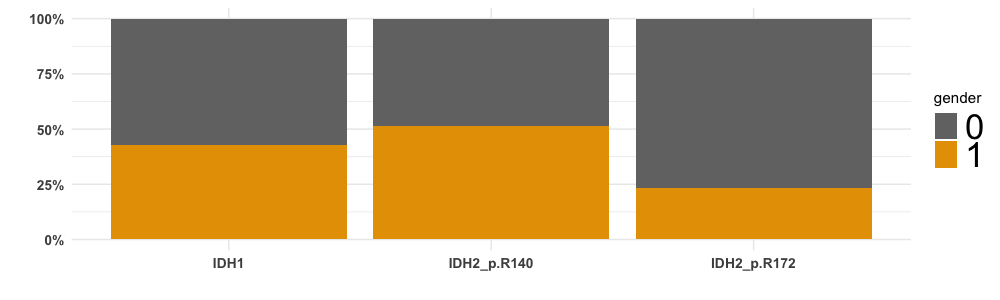

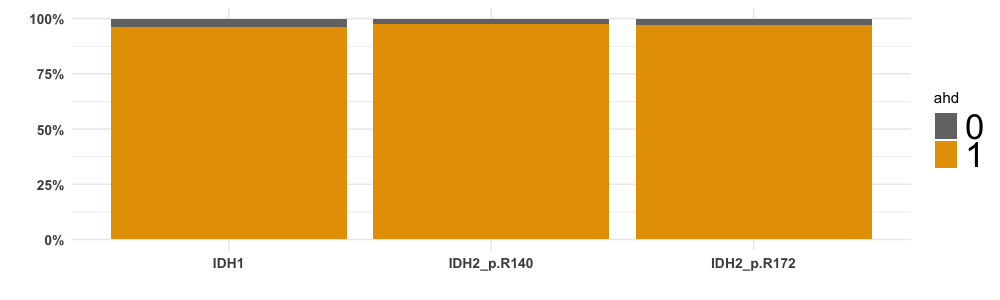

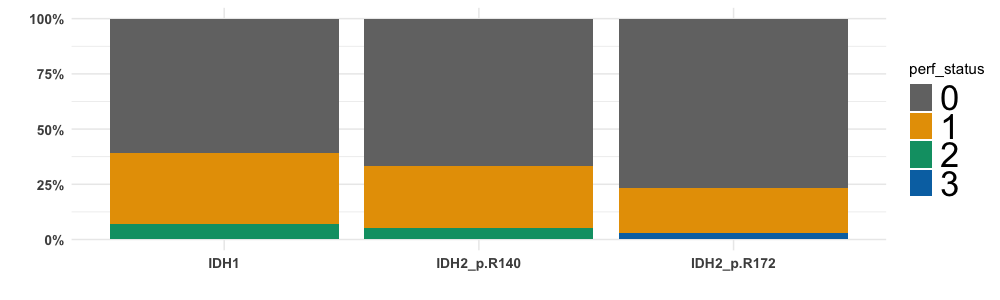

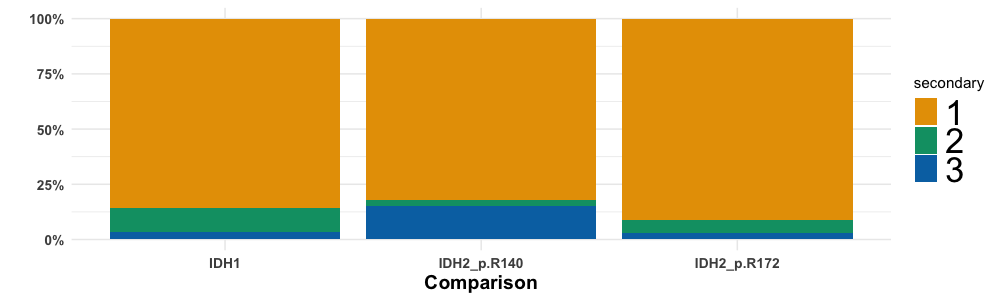

In [221]:
binary_correlates <- c("gender","ahd","perf_status","secondary")
continuous_correlates <- c("age","wbc","hb","plt","bm_blasts")
set_notebook_plot_size(10,3)
# pdf(file="graphs/comparison_components.pdf",width=30,height=5)
v=c("0" = "grey45", "1" = "#e79f00", "2" = "#009E73", "3" ="#0072B2", "4"="#CC79A7")
tmp <- NULL
p <- list()
q <- list()
tmp <- df_w_correlates[df_w_correlates$full_component_DNMT3A_IDH1_2==1,]

tmp$comparison <- ifelse(tmp$IDH1==1,"IDH1",
                        ifelse(tmp$IDH2_p.R140==1,"IDH2_p.R140","IDH2_p.R172"))
tmp$comparison <- factor(tmp$comparison)
i <- 1
for (bin in binary_correlates){
    plot(ggplot(tmp, aes(factor(comparison), fill = factor(tmp[,bin]))) + 
      geom_bar(position = "fill") +
      scale_y_continuous(labels = scales::percent)+
      xlab(ifelse(i==4,"Comparison",""))+scale_fill_manual(values = v)+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=10,face="bold"),axis.title=element_text(size=14,face="bold"),legend.text = element_text(size=25))+
        guides(fill=guide_legend(title=bin))+ylab(""))
i <- i+1
}
set_notebook_plot_size(10,4)
i <-1

p <-ggplot(tmp,aes(x=comparison,y=tmp[,"age"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("IDH1","IDH2_p.R140"),c("IDH1","IDH2_p.R172"),c("IDH2_p.R140","IDH2_p.R172")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("age")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


q <-ggplot(tmp,aes(x=comparison,y=tmp[,"wbc"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("IDH1","IDH2_p.R140"),c("IDH1","IDH2_p.R172"),c("IDH2_p.R140","IDH2_p.R172")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("wbc")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")

r <-ggplot(tmp,aes(x=comparison,y=tmp[,"hb"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("IDH1","IDH2_p.R140"),c("IDH1","IDH2_p.R172"),c("IDH2_p.R140","IDH2_p.R172")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("hb")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


s <-ggplot(tmp,aes(x=comparison,y=tmp[,"plt"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("IDH1","IDH2_p.R140"),c("IDH1","IDH2_p.R172"),c("IDH2_p.R140","IDH2_p.R172")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("plt")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")


t <-ggplot(tmp,aes(x=comparison,y=tmp[,"bm_blasts"])) +
geom_boxplot(aes(fill = factor(comparison))) + stat_compare_means(comparisons=list(c("IDH1","IDH2_p.R140"),c("IDH1","IDH2_p.R172"),c("IDH2_p.R140","IDH2_p.R172")),paired=F,test="wilcox.test",size=7)+

theme1+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
                                  "#9ad0f3", "#D55E00","lightskyblue","mistyrose4", 
                                  "darkseagreen","lightgoldenrod","lightsalmon","#F0E442",
                                  "firebrick3","#000000","#870C14","#a6bddb","#fdbb84","deeppink"))+
ylab("bm_blasts")+xlab(ifelse(i==5,"Comparison",""))+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=34,face="bold"))+theme(legend.position = "none")

png("dnmt3a_comp.png",width=4000,height=6100,res=200)
set_notebook_plot_size(30,30)
grid.arrange(p,q,r,s,t,nrow=5)
dev.off()

# dev.off()

In [222]:
png("dnmt3a_comp.png",width=4000,height=6100,res=200)
set_notebook_plot_size(30,30)
grid.arrange(p,q,r,s,t,nrow=5)
dev.off()

pdf 
  2

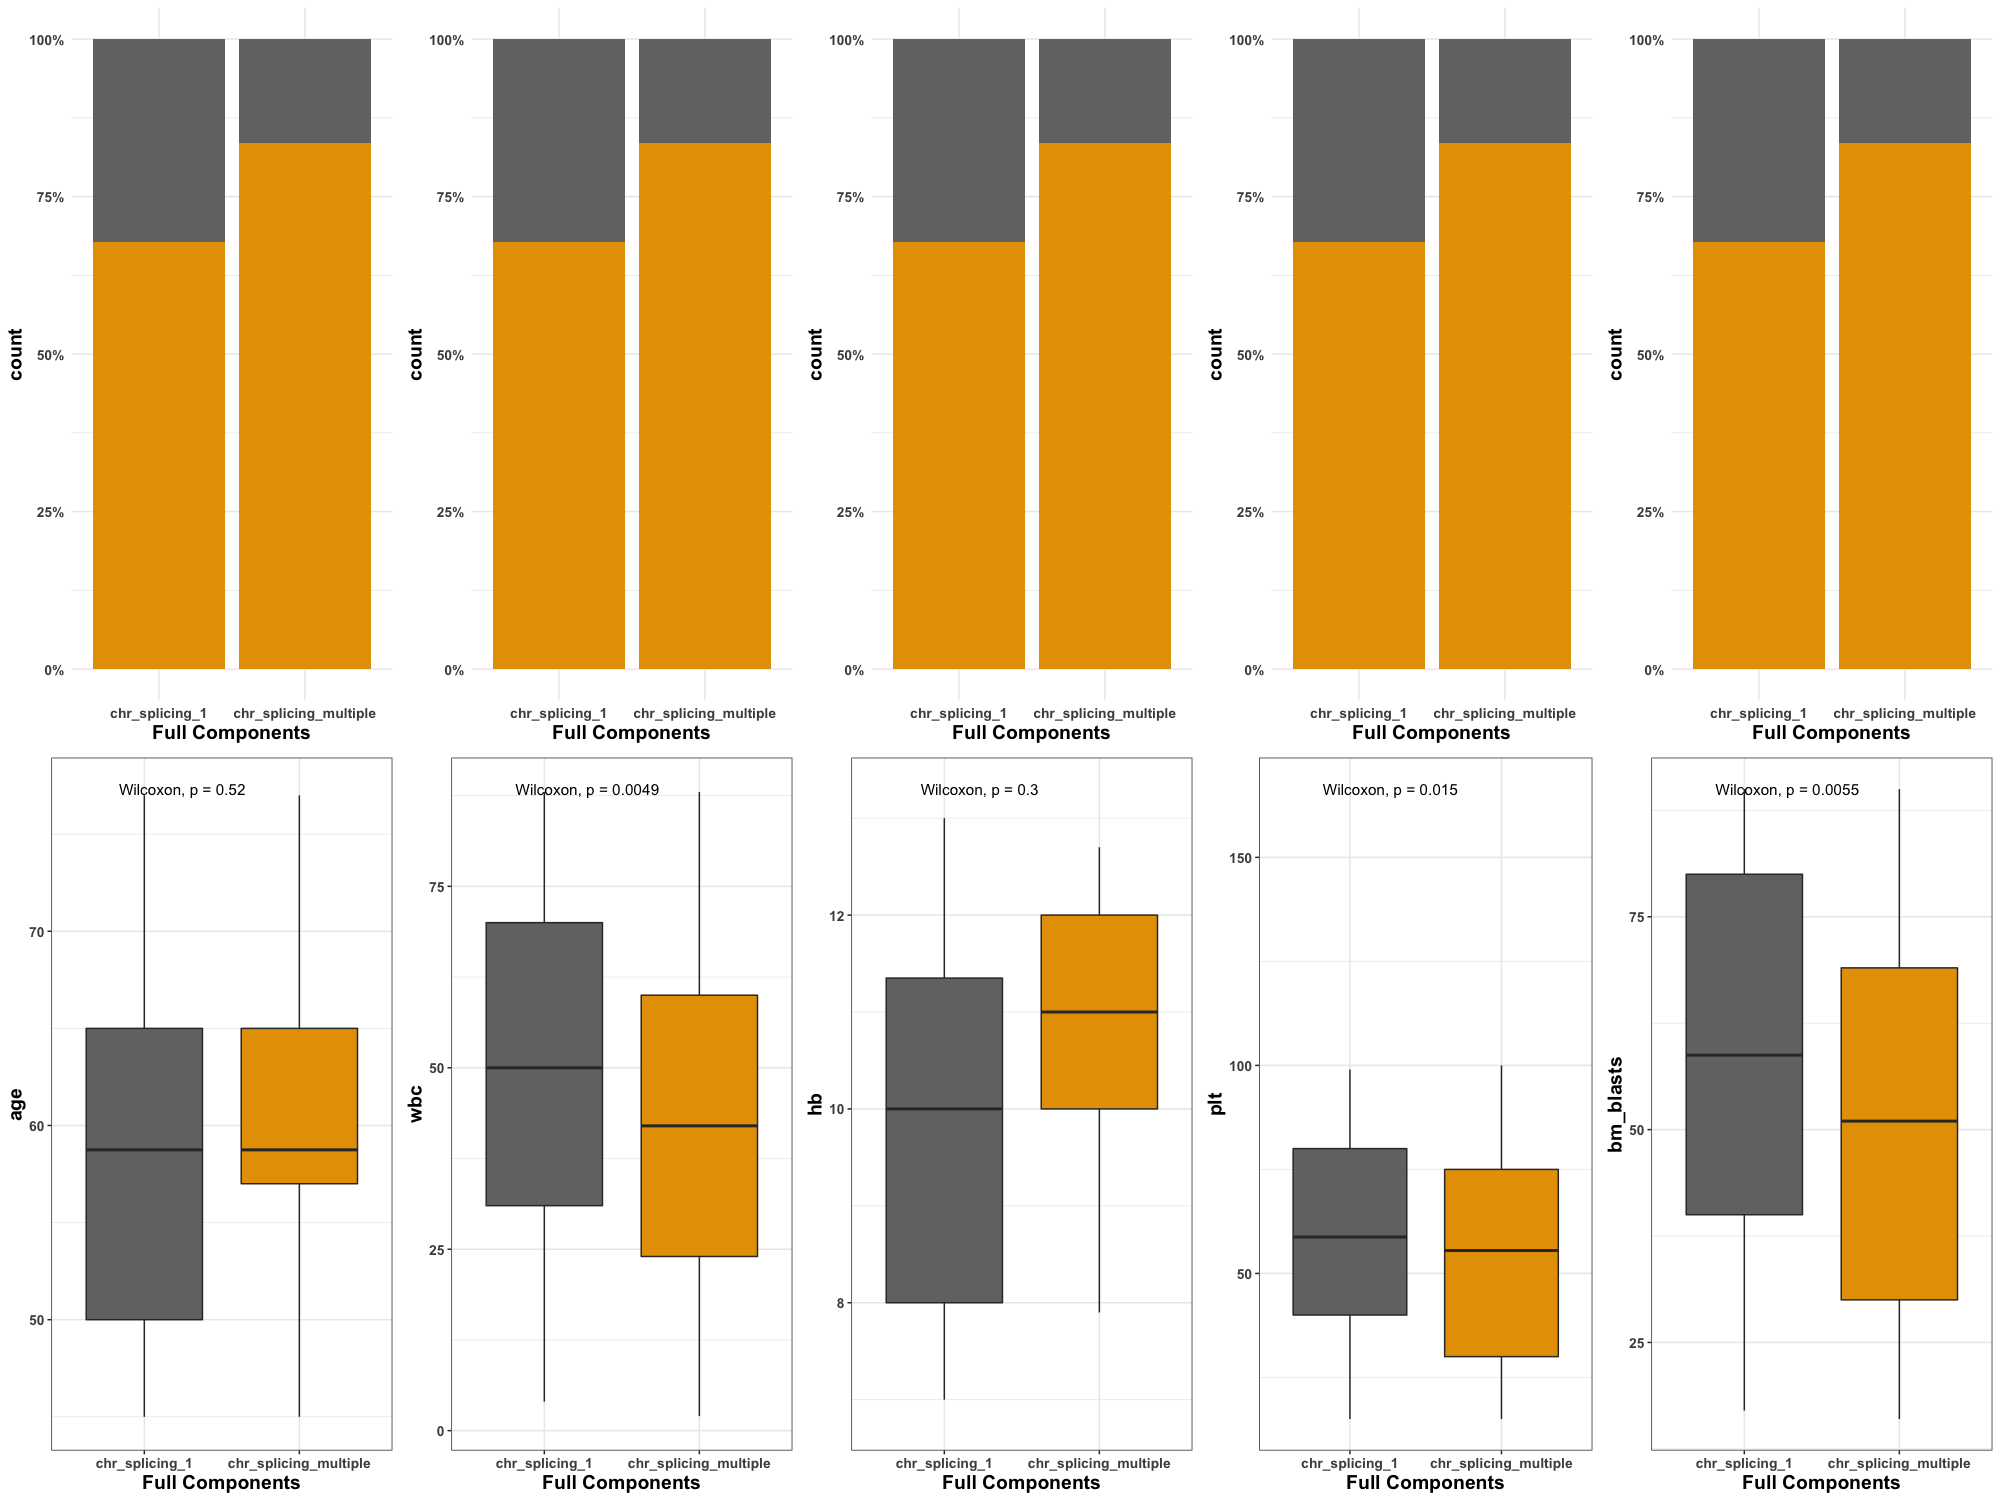

In [182]:
set_notebook_plot_size(20,15)
do.call("grid.arrange",c(p,q,nrow=2))

# MULTIREGRESSION PLOT NPM1 OS AND RFS

In [40]:
# RFS
tmp <-read.table('../prognosis/Prognosis_locked/handovercompiled.Yanis.080919.csv',sep=",",header=T)
rownames(tmp) <- tmp$data_pd
cols_to_keep <- colnames(tmp)
master <- read.table('../../data/initial_dataset/Master_04_10_2019.csv',sep=",",header=T)
rownames(master) <- master$data_pd
df <- read.table('../clustering/clustering_Final_1/df_final_full_component.tsv')
df_merge <- merge(df,master[,cols_to_keep],by=0)
rownames(df_merge) <- df_merge$Row.names
df_merge <- df_merge[-1]

# keep only patients with AML 17
df_merge$AMLID <- as.character(df_merge$AMLID)
df_merge$MRD1 <- as.character(df_merge$MRD1)
df_merge <- df_merge[grep("17-", df_merge$AMLID),]
df_merge$MRD_status <- ifelse(df_merge$MRD1=="CR,MRD-" ,"CR,MRD-",
                         ifelse(df_merge$MRD1=="CR,MRD+" ,"CR,MRD+","_others"))   ## _others instead of others for color purposes
df_merge[is.na(df_merge$MRD_status),"MRD_status"] <- "_others"
df_merge <- df_merge[!is.na(df_merge$OS_CR) & (df_merge$RFSyears>0) & (df_merge$OS_CR>0),]
co <- "full_component_NPM1"

tmp_final <- df_merge


## OS_CR

if (nrow(tmp_final[tmp_final[,co]==1,])>100){    # we can not run lasso on a model without any events (variance 0)
        data <- tmp_final[tmp_final[,co]==1,]
        df_multi <- NULL
        i <- 1
        for (i in c(1:100)){
            res1 <- cv.glmnet(data.matrix(data[,c(gen,cyto)]), Surv(data$os,data$os_status), family="cox",alpha=1,nfolds=10)
            df_multi <- cbind(df_multi,as.matrix(coef(res1,s="lambda.min")))
            i <- i+1
            }

        l <- data.frame(coef = rowSums(df_multi)/100)
        l$names <- rownames(l)
        l$Model <- ifelse(l$names %in% gen,"gen",
                      ifelse(l$names %in% cyto,"cyto",
                            ifelse(l$names %in% clin, "clin",
                                  ifelse(l$names %in% demo, "demo",
                                        ifelse(l$names %in% eln, "eln","comp")))))
        
        }

## RFS

if (nrow(tmp_final[tmp_final[,co]==1,])>100){    # we can not run lasso on a model without any events (variance 0)
        data <- tmp_final[tmp_final[,co]==1,]
        df_multi <- NULL
        i <- 1
        for (i in c(1:100)){
            res1 <- cv.glmnet(data.matrix(data[,c(gen,cyto)]), Surv(data$RFSyears,data$RFSStatus), family="cox",alpha=1,nfolds=10)
            df_multi <- cbind(df_multi,as.matrix(coef(res1,s="lambda.min")))
            i <- i+1
            }

        l_RFS <- data.frame(coef = rowSums(df_multi)/100)
        l_RFS$names <- rownames(l_RFS)
        l_RFS$Model <- ifelse(l_RFS$names %in% gen,"gen",
                      ifelse(l_RFS$names %in% cyto,"cyto",
                            ifelse(l_RFS$names %in% clin, "clin",
                                  ifelse(l_RFS$names %in% demo, "demo",
                                        ifelse(l_RFS$names %in% eln, "eln","comp")))))
        
        }

In [43]:
colors_analysis <- c(gen="#BFBFBF",cyto="#2b8cbe")
t <- ggplot(l[l$coef!=0,],aes(x=names,y=coef,fill=Model))+geom_bar(stat="identity")+coord_flip()+
        theme(plot.title = element_text(hjust = 0.5,size=35),axis.text=element_text(size=20),axis.title=element_text(size=24,face="bold"))+
        scale_fill_manual(values=colors_analysis,limits=names(colors_analysis))+ggtitle("OS_CR")+guides(fill=F)

s <- ggplot(l_RFS[l_RFS$coef!=0,],aes(x=names,y=coef,fill=Model))+geom_bar(stat="identity")+coord_flip()+
        theme(plot.title = element_text(hjust = 0.5,size=35),axis.text=element_text(size=20),axis.title=element_text(size=24,face="bold"),legend.title=element_text(size=25),legend.text=element_text(size=20))+
        scale_fill_manual(values=colors_analysis,limits=names(colors_analysis))+ggtitle("RFS")

In [44]:
set_notebook_plot_size(20,10)
png("multi_regression_NPM1.png",width=5000,height=5000,res=300)
grid.arrange(t,s,ncol=2)
dev.off()

pdf 
  2